### Stock Price Prediction Based on News Feed and Twitter Sentiment Analysis

COMP 5360, University of Utah, http://datasciencecourse.net/

Project Version: Final Submission

Due Date: Sunday April 21, 2019

Names: Ashish Lakhmani, Kanika Moondra, Sahaj Chhabra

Email addresses: u1217839@utah.edu, u1228166@utah.edu, u1228559@utah.edu

Video Link: https://youtu.be/gdrZsCNpyS8

### Background and Motivation:

In today's world finance is becoming increasingly about technology and data science. In that same vein, this project aims to be a proof of concept for the analyzing of social media to get the public opinion of a Stock.

With a simple tweet, snapchat's stock fell dramatically. This suggests that social media can have a huge impact on the stock market. By analyzing these trends and monitoring public opinion of companies we built a predictive model to exploit market inefficiencies and anticipate changes in the market before they happen. Because machine learning algorithms can pull data automatically from these sources and can analyze them in real-time, this could revolutionize the finance industry as a whole.

Stock prices are considered as a basic measure in the prediction of the stock market. Well defined strategies are used for earning high profit. However, level of accuracy in prediction is not very satisfactory. One way of improving this prediction process is by incorporating the sentiments and moods of the public from Twitter along with News events at that period of time. In this project, we have performed sentiment analysis from the Tweets related to the stock market as well as News feeds.

Recently Twitter has been used to detect and forecast trading and investing to break critical financial news faster. Thus, if sentiments are correctly categorized and their polarity is correctly determined they can be helpful in enhancing a company’s performance and making its investors(our focused audience) happy. This project will aim in gathering the public sentiment, as expressed in large scale collections of daily Twitter posts and News feeds collected from stock related websites and predicting the stock prices based on the gathered data.

### Project Objectives

Understanding the use of applying sentiment analysis on Company Tweets and News headlines for a given time period?

How does the sentiment scores impact the stock prices for that time period?

How well we are able to understand the company's financial performance in market based on the public opinion?

How well does the sentiment scores fit with the price derivation to predict the stock prices?

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import glob
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
import seaborn as sns
import scipy as sc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,30)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAHAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TWITTER SENTIMENT ANALYSIS

In [2]:
df = pd.read_csv('Tesla_New.csv',encoding='latin-1') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [3]:
df.head()

Date_Time        Date  \
0  2019-03-16 05:47:56  2019-03-16   
1  2019-03-16 05:47:56  2019-03-16   
2  2019-03-16 06:14:15  2019-03-16   
3  2019-03-16 06:14:15  2019-03-16   
4  2019-03-16 06:43:17  2019-03-16   

                                              Tweets  
0  The $TSLA bull thesis is youÕll spend $50k on ...  
1  The $TSLA bull thesis is youÕll spend $50k on ...  
2  @OffBrandCapital I can't handle a frenzy, unfo...  
3  @OffBrandCapital I can't handle a frenzy, unfo...  
4  @IgnorantForever $TSLA has to survive 90 days ...

In [4]:
df = df.drop(["Date_Time"], axis=1)

In [5]:
df.head()

Date                                             Tweets
0  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...
1  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...
2  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...
3  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...
4  2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...

### Data Cleaning

We then performed data cleaning over the raw data that we got from tweets as well as news, we performed the following functions to achieve clean data:

Removing punctuations

Removing new line

Removing https at the end of text data

Removing numbers

Removing ASCII values

Applied Tokenizer

Applied Lemmatizer

Removed stopwords.

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df['Tweet_punct'] = df['Tweets'].apply(lambda x: remove_punct(x))
df.head(20)

Date                                             Tweets  \
0   2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1   2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2   2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3   2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4   2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   
5   2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   
6   2019-03-16  @AlhashmixUAE @NS673580 @HyperChangeTV @elonmu...   
7   2019-03-16  @AlhashmixUAE @NS673580 @HyperChangeTV @elonmu...   
8   2019-03-16  most active stock options Friday AM - $TSLA $A...   
9   2019-03-16  most active stock options Friday AM - $TSLA $A...   
10  2019-03-16  He's...he's going with that as his latest pump...   
11  2019-03-16  He's...he's going with that as his latest pump...   
12  2019-03-16  One might ask, what's the big, exciting future...   
13  2019-03-16  One might ask, what's the big, exciting future...   
14  2019-03-16  After years of silence, Peter Hochholdinger em...   
15  2019-03-16  After years of silence, Peter Hochholdinger em...   
16  2019-03-16  Great thread. The only reason to rush a reveal...   
17  2019-03-16  Great thread. The only reason to rush a reveal...   
18  2019-03-16  Nothing to see. Keep moving, keep scrolling. $...   
19  2019-03-16  Nothing to see. Keep moving, keep scrolling. $...   

                                          Tweet_punct  
0   The TSLA bull thesis is youÕll spend  k on a c...  
1   The TSLA bull thesis is youÕll spend  k on a c...  
2   OffBrandCapital I cant handle a frenzy unfortu...  
3   OffBrandCapital I cant handle a frenzy unfortu...  
4   IgnorantForever TSLA has to survive   days aft...  
5   IgnorantForever TSLA has to survive   days aft...  
6   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...  
7   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...  
8   most active stock options Friday AM  TSLA AAPL...  
9   most active stock options Friday AM  TSLA AAPL...  
10  Heshes going with that as his latest pump Stoc...  
11  Heshes going with that as his latest pump Stoc...  
12  One might ask whats the big exciting future na...  
13  One might ask whats the big exciting future na...  
14  After years of silence Peter Hochholdinger eme...  
15  After years of silence Peter Hochholdinger eme...  
16  Great thread The only reason to rush a reveal ...  
17  Great thread The only reason to rush a reveal ...  
18  Nothing to see Keep moving keep scrolling TSLA...  
19  Nothing to see Keep moving keep scrolling TSLA...

In [8]:
# removing newline or \n expressions.
df["Tweet_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df["Tweet_punct"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1   2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2   2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3   2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4   2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   
5   2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   
6   2019-03-16  @AlhashmixUAE @NS673580 @HyperChangeTV @elonmu...   
7   2019-03-16  @AlhashmixUAE @NS673580 @HyperChangeTV @elonmu...   
8   2019-03-16  most active stock options Friday AM - $TSLA $A...   
9   2019-03-16  most active stock options Friday AM - $TSLA $A...   
10  2019-03-16  He's...he's going with that as his latest pump...   
11  2019-03-16  He's...he's going with that as his latest pump...   
12  2019-03-16  One might ask, what's the big, exciting future...   
13  2019-03-16  One might ask, what's the big, exciting future...   
14  2019-03-16  After years of silence, Peter Hochholdinger em...   
15  2019-03-16  After years of silence, Peter Hochholdinger em...   
16  2019-03-16  Great thread. The only reason to rush a reveal...   
17  2019-03-16  Great thread. The only reason to rush a reveal...   
18  2019-03-16  Nothing to see. Keep moving, keep scrolling. $...   
19  2019-03-16  Nothing to see. Keep moving, keep scrolling. $...   

                                          Tweet_punct  \
0   The TSLA bull thesis is youÕll spend  k on a c...   
1   The TSLA bull thesis is youÕll spend  k on a c...   
2   OffBrandCapital I cant handle a frenzy unfortu...   
3   OffBrandCapital I cant handle a frenzy unfortu...   
4   IgnorantForever TSLA has to survive   days aft...   
5   IgnorantForever TSLA has to survive   days aft...   
6   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...   
7   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...   
8   most active stock options Friday AM  TSLA AAPL...   
9   most active stock options Friday AM  TSLA AAPL...   
10  Heshes going with that as his latest pump Stoc...   
11  Heshes going with that as his latest pump Stoc...   
12  One might ask whats the big exciting future na...   
13  One might ask whats the big exciting future na...   
14  After years of silence Peter Hochholdinger eme...   
15  After years of silence Peter Hochholdinger eme...   
16  Great thread The only reason to rush a reveal ...   
17  Great thread The only reason to rush a reveal ...   
18  Nothing to see Keep moving keep scrolling TSLA...   
19  Nothing to see Keep moving keep scrolling TSLA...   

                                      Tweet_nonewline  
0   The TSLA bull thesis is youÕll spend  k on a c...  
1   The TSLA bull thesis is youÕll spend  k on a c...  
2   OffBrandCapital I cant handle a frenzy unfortu...  
3   OffBrandCapital I cant handle a frenzy unfortu...  
4   IgnorantForever TSLA has to survive   days aft...  
5   IgnorantForever TSLA has to survive   days aft...  
6   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...  
7   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...  
8   most active stock options Friday AM  TSLA AAPL...  
9   most active stock options Friday AM  TSLA AAPL...  
10  Heshes going with that as his latest pump Stoc...  
11  Heshes going with that as his latest pump Stoc...  
12  One might ask whats the big exciting future na...  
13  One might ask whats the big exciting future na...  
14  After years of silence Peter Hochholdinger eme...  
15  After years of silence Peter Hochholdinger eme...  
16  Great thread The only reason to rush a reveal ...  
17  Great thread The only reason to rush a reveal ...  
18  Nothing to see Keep moving keep scrolling TSLA...  
19  Nothing to see Keep moving keep scrolling TSLA...

In [9]:
# Removing http url from every tweet substitued with space
df["Tweet_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df["Tweet_nonewline"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4  2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   

                                         Tweet_punct  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_nonewline  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                        Tweet_wohttp  
0  The TSLA bull thesis is youÕll spend  k on a c...  
1  The TSLA bull thesis is youÕll spend  k on a c...  
2  OffBrandCapital I cant handle a frenzy unfortu...  
3  OffBrandCapital I cant handle a frenzy unfortu...  
4  IgnorantForever TSLA has to survive   days aft...

In [10]:
# Removing numbers
df["Tweet_nonum"] = [re.sub("\d+", " ", text) for text in df["Tweet_wohttp"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1   2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2   2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3   2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4   2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   
5   2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   
6   2019-03-16  @AlhashmixUAE @NS673580 @HyperChangeTV @elonmu...   
7   2019-03-16  @AlhashmixUAE @NS673580 @HyperChangeTV @elonmu...   
8   2019-03-16  most active stock options Friday AM - $TSLA $A...   
9   2019-03-16  most active stock options Friday AM - $TSLA $A...   
10  2019-03-16  He's...he's going with that as his latest pump...   
11  2019-03-16  He's...he's going with that as his latest pump...   
12  2019-03-16  One might ask, what's the big, exciting future...   
13  2019-03-16  One might ask, what's the big, exciting future...   
14  2019-03-16  After years of silence, Peter Hochholdinger em...   
15  2019-03-16  After years of silence, Peter Hochholdinger em...   
16  2019-03-16  Great thread. The only reason to rush a reveal...   
17  2019-03-16  Great thread. The only reason to rush a reveal...   
18  2019-03-16  Nothing to see. Keep moving, keep scrolling. $...   
19  2019-03-16  Nothing to see. Keep moving, keep scrolling. $...   

                                          Tweet_punct  \
0   The TSLA bull thesis is youÕll spend  k on a c...   
1   The TSLA bull thesis is youÕll spend  k on a c...   
2   OffBrandCapital I cant handle a frenzy unfortu...   
3   OffBrandCapital I cant handle a frenzy unfortu...   
4   IgnorantForever TSLA has to survive   days aft...   
5   IgnorantForever TSLA has to survive   days aft...   
6   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...   
7   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...   
8   most active stock options Friday AM  TSLA AAPL...   
9   most active stock options Friday AM  TSLA AAPL...   
10  Heshes going with that as his latest pump Stoc...   
11  Heshes going with that as his latest pump Stoc...   
12  One might ask whats the big exciting future na...   
13  One might ask whats the big exciting future na...   
14  After years of silence Peter Hochholdinger eme...   
15  After years of silence Peter Hochholdinger eme...   
16  Great thread The only reason to rush a reveal ...   
17  Great thread The only reason to rush a reveal ...   
18  Nothing to see Keep moving keep scrolling TSLA...   
19  Nothing to see Keep moving keep scrolling TSLA...   

                                      Tweet_nonewline  \
0   The TSLA bull thesis is youÕll spend  k on a c...   
1   The TSLA bull thesis is youÕll spend  k on a c...   
2   OffBrandCapital I cant handle a frenzy unfortu...   
3   OffBrandCapital I cant handle a frenzy unfortu...   
4   IgnorantForever TSLA has to survive   days aft...   
5   IgnorantForever TSLA has to survive   days aft...   
6   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...   
7   AlhashmixUAE NS  HyperChangeTV elonmusk Unfort...   
8   most active stock options Friday AM  TSLA AAPL...   
9   most active stock options Friday AM  TSLA AAPL...   
10  Heshes going with that as his latest pump Stoc...   
11  Heshes going with that as his latest pump Stoc...   
12  One might ask whats the big exciting future na...   
13  One might ask whats the big exciting future na...   
14  After years of silence Peter Hochholdinger eme...   
15  After years of silence Peter Hochholdinger eme...   
16  Great thread The only reason to rush a reveal ...   
17  Great thread The only reason to rush a reveal ...   
18  Nothing to see Keep moving keep scrolling TSLA...   
19  Nothing to see Keep moving keep scrolling TSLA...   

                                         Tweet_wohttp  \
0   The TSLA bull thesis is youÕll spend  k on a c...   
1   The TSLA bull thesis is youÕll spend  k on a c

In [11]:
#Removing ASCII values
df["Tweet_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df["Tweet_nonum"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4  2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   

                                         Tweet_punct  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_nonewline  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                        Tweet_wohttp  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                         Tweet_nonum  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                       Tweet_noascii  
0  The TSLA bull thesis is you ll spend  k on a c...  
1  The TSLA bull thesis is you ll spend  k on a c...  
2  OffBrandCapital I cant handle a frenzy unfortu...  
3  OffBrandCapital I cant handle a frenzy unfortu...  
4  IgnorantForever TSLA has to survive   days aft...

In [12]:
# Applying Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_noascii'].apply(lambda x: tokenization(x.lower()))
df.head()

Date                                             Tweets  \
0  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4  2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   

                                         Tweet_punct  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_nonewline  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                        Tweet_wohttp  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                         Tweet_nonum  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                       Tweet_noascii  \
0  The TSLA bull thesis is you ll spend  k on a c...   
1  The TSLA bull thesis is you ll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_tokenized  
0  [the, tsla, bull, thesis, is, you, ll, spend, ...  
1  [the, tsla, bull, thesis, is, you, ll, spend, ...  
2  [offbrandcapital, i, cant, handle, a, frenzy, ...  
3  [offbrandcapital, i, cant, handle, a, frenzy, ...  
4  [ignorantforever, tsla, has, to, survive, days...

In [13]:
# Applying Lemmatizer
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_tokenized'].apply(lambda x: lemmatizer(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4  2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   

                                         Tweet_punct  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_nonewline  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                        Tweet_wohttp  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                         Tweet_nonum  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                       Tweet_noascii  \
0  The TSLA bull thesis is you ll spend  k on a c...   
1  The TSLA bull thesis is you ll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_tokenized  \
0  [the, tsla, bull, thesis, is, you, ll, spend, ...   
1  [the, tsla, bull, thesis, is, you, ll, spend, ...   
2  [offbrandcapital, i, cant, handle, a, frenzy, ...   
3  [offbrandcapital, i, cant, handle, a, frenzy, ...   
4  [ignorantforever, tsla, has, to, survive, days...   

                                    Tweet_lemmatized  
0  [the, tsla, bull, thesis, be, you, ll, spend, ...  
1  [the, tsla, bull, thesis, be, you, ll, spend, ...  
2  [offbrandcapital, i, cant, handle, a, frenzy, ...  
3  [offbrandcapital, i, cant, handle, a, frenzy, ...  
4  [ignorantforever, tsla, have, to, survive, day...

In [14]:
stopword = nltk.corpus.stopwords.words('english')

In [15]:
# Removing Stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
1  2019-03-16  The $TSLA bull thesis is youÕll spend $50k on ...   
2  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
3  2019-03-16  @OffBrandCapital I can't handle a frenzy, unfo...   
4  2019-03-16  @IgnorantForever $TSLA has to survive 90 days ...   

                                         Tweet_punct  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_nonewline  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                        Tweet_wohttp  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                         Tweet_nonum  \
0  The TSLA bull thesis is youÕll spend  k on a c...   
1  The TSLA bull thesis is youÕll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                       Tweet_noascii  \
0  The TSLA bull thesis is you ll spend  k on a c...   
1  The TSLA bull thesis is you ll spend  k on a c...   
2  OffBrandCapital I cant handle a frenzy unfortu...   
3  OffBrandCapital I cant handle a frenzy unfortu...   
4  IgnorantForever TSLA has to survive   days aft...   

                                     Tweet_tokenized  \
0  [the, tsla, bull, thesis, is, you, ll, spend, ...   
1  [the, tsla, bull, thesis, is, you, ll, spend, ...   
2  [offbrandcapital, i, cant, handle, a, frenzy, ...   
3  [offbrandcapital, i, cant, handle, a, frenzy, ...   
4  [ignorantforever, tsla, has, to, survive, days...   

                                    Tweet_lemmatized  \
0  [the, tsla, bull, thesis, be, you, ll, spend, ...   
1  [the, tsla, bull, thesis, be, you, ll, spend, ...   
2  [offbrandcapital, i, cant, handle, a, frenzy, ...   
3  [offbrandcapital, i, cant, handle, a, frenzy, ...   
4  [ignorantforever, tsla, have, to, survive, day...   

                                       Tweet_nonstop  
0  [tsla, bull, thesis, spend, k, car, soon, k, h...  
1  [tsla, bull, thesis, spend, k, car, soon, k, h...  
2  [offbrandcapital, cant, handle, frenzy, unfort...  
3  [offbrandcapital, cant, handle, frenzy, unfort...  
4  [ignorantforever, tsla, survive, days, pay, ma...

In [16]:
#Keeping just Text and Date
Tesla_Data_Tweets = df.drop(["Tweets","Tweet_punct","Tweet_nonewline","Tweet_wohttp","Tweet_nonum","Tweet_noascii","Tweet_tokenized","Tweet_lemmatized"], axis=1)

In [17]:
Tesla_Data_Tweets.head()

Date                                      Tweet_nonstop
0  2019-03-16  [tsla, bull, thesis, spend, k, car, soon, k, h...
1  2019-03-16  [tsla, bull, thesis, spend, k, car, soon, k, h...
2  2019-03-16  [offbrandcapital, cant, handle, frenzy, unfort...
3  2019-03-16  [offbrandcapital, cant, handle, frenzy, unfort...
4  2019-03-16  [ignorantforever, tsla, survive, days, pay, ma...

In [18]:
Tesla_Data_Tweets['Year']=[d.split('-')[0] for d in Tesla_Data_Tweets.Date]
Tesla_Data_Tweets['Month']=[d.split('-')[1] for d in Tesla_Data_Tweets.Date]
Tesla_Data_Tweets['Day']=[d.split('-')[2] for d in Tesla_Data_Tweets.Date]

In [19]:
Tesla_Data_Tweets.head()

Date                                      Tweet_nonstop  Year Month  \
0  2019-03-16  [tsla, bull, thesis, spend, k, car, soon, k, h...  2019    03   
1  2019-03-16  [tsla, bull, thesis, spend, k, car, soon, k, h...  2019    03   
2  2019-03-16  [offbrandcapital, cant, handle, frenzy, unfort...  2019    03   
3  2019-03-16  [offbrandcapital, cant, handle, frenzy, unfort...  2019    03   
4  2019-03-16  [ignorantforever, tsla, survive, days, pay, ma...  2019    03   

  Day  
0  16  
1  16  
2  16  
3  16  
4  16

In [20]:
Tesla_Data_Tweets = Tesla_Data_Tweets.drop(['Date','Year'],axis=1)

In [21]:
Tesla_Data_Tweets.head()

Tweet_nonstop Month Day
0  [tsla, bull, thesis, spend, k, car, soon, k, h...    03  16
1  [tsla, bull, thesis, spend, k, car, soon, k, h...    03  16
2  [offbrandcapital, cant, handle, frenzy, unfort...    03  16
3  [offbrandcapital, cant, handle, frenzy, unfort...    03  16
4  [ignorantforever, tsla, survive, days, pay, ma...    03  16

In [22]:
#Removing redundant Data and Grouping only by Month and Day.
final_dataset_Tweets = pd.DataFrame(data=None, index=None,columns=['Month','Day','Tweet_nonstop'])

In [23]:
final_dataset_Tweets = Tesla_Data_Tweets.groupby(['Month', 'Day'])['Tweet_nonstop'].apply(list).reset_index()

In [24]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  [[tsla, bull, thesis, spend, k, car, soon, k, ...
1    03  17  [[size, right, time, x, q, yhg, spy, study, fb...
2    03  18  [[hmmmm, reply, dms, hno, article, tsla, servi...
3    03  19  [[gwestr, model, least, explode, head, tsla, s...
4    03  20  [[haha, yeah, tsla, commit, fraud, everywhere,...

In [25]:
#Converting List to Dictionary
def ltod(a):
    dic={}
    for i in range(len(a)):
        for j in a[i]:
            if j in dic:
                dic[j]+=1
            else:
                dic[j]=1
    return dic

In [26]:
final_dataset_Tweets['Tweet_nonstop']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: ltod(x))

In [27]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  {'tsla': 962, 'bull': 6, 'thesis': 2, 'spend':...
1    03  17  {'size': 16, 'right': 26, 'time': 34, 'x': 56,...
2    03  18  {'hmmmm': 2, 'reply': 12, 'dms': 2, 'hno': 2, ...
3    03  19  {'gwestr': 10, 'model': 186, 'least': 16, 'exp...
4    03  20  {'haha': 2, 'yeah': 16, 'tsla': 2294, 'commit'...

In [28]:
#Calling Positive words List.
with open('positive_words.txt') as f:
    pos_lines = f.read().splitlines()
len(pos_lines)

2005

In [29]:
#Calling Negative words List.
with open('negative_words.txt') as f:
    neg_lines = f.read().splitlines()
len(neg_lines)

4781

In [30]:
#Calculating Positive Scores and Negative Scores
def pos_parity(x):
    pos_count=0
    total = sum(x.values())
    for i in pos_lines:
        if i in x:
            pos_count+=x[i]
    return float(pos_count/total)

In [31]:
def neg_parity(x):
    neg_count=0
    for i in neg_lines:
        if i in x:
            neg_count+=x[i]
    return float(neg_count/(sum(x.values())))

In [32]:
comb_word_tweet={}
len(final_dataset_Tweets.Tweet_nonstop)

31

### Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words

Performed data analysis on the textual data to get the understanding of how public opinion which is conveyed as a set of positive and negative words.

Here we got the understanding for applying feature engineering over our data to generate features that may have, potentially, a higher significance over each company’s financial performance.

The same process of data analysis was done for all the brands.

In [33]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [34]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['hard', 'contempt', 'lose', 'fall', 'issue', 'lie', 'bad', 'miss', 'break', 'fraud'] [309, 327, 348, 371, 375, 437, 519, 608, 662, 759]


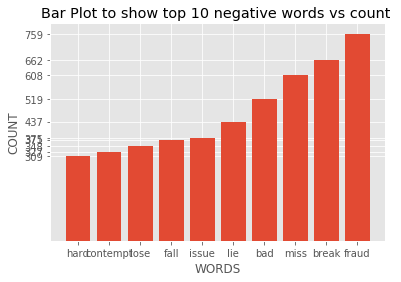

In [35]:
# Plotting the Bar Plot to show top 10 negative words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [36]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [37]:
my_list_names = []
my_list_values = []

for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['top', 'break', 'fraud', 'great', 'work', 'well', 'right', 'good', 'free', 'like'] [638, 662, 759, 763, 827, 889, 911, 1296, 1695, 2602]


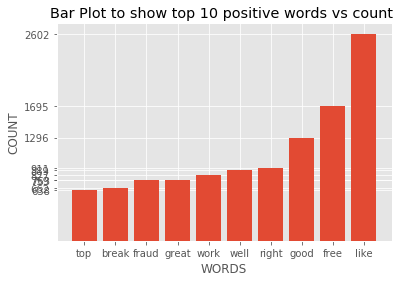

In [38]:
# Plotting the Bar Plot to show top 10 positive words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 positive words vs count ")
plt.show()

## Sentiment Analysis

We created our own sentiment parity generator by creating 2 customized files named positive_words and negative words. This gave us the benefit of getting only positive and negative scores.

Thus, we were able to understand financial performance of each brands more closely as a product of ups and downs of stock prices with respect to scores.

In [39]:
#Sentiment Score Generator
final_dataset_Tweets['pos_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: pos_parity(x))

In [40]:
final_dataset_Tweets['neg_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: neg_parity(x))


In [41]:
final_dataset_Tweets

Month Day                                      Tweet_nonstop  \
0     03  16  {'tsla': 962, 'bull': 6, 'thesis': 2, 'spend':...   
1     03  17  {'size': 16, 'right': 26, 'time': 34, 'x': 56,...   
2     03  18  {'hmmmm': 2, 'reply': 12, 'dms': 2, 'hno': 2, ...   
3     03  19  {'gwestr': 10, 'model': 186, 'least': 16, 'exp...   
4     03  20  {'haha': 2, 'yeah': 16, 'tsla': 2294, 'commit'...   
5     03  21  {'tsla': 2722, 'ap': 14, 'aid': 4, 'except': 8...   
6     03  22  {'read': 40, 'letter': 4, 'elon': 258, 'write'...   
7     03  23  {'simple': 2, 'thing': 18, 'dont': 52, 'get': ...   
8     03  24  {'sriniworld': 8, 'tilmanwinkler': 8, 'uhh': 2...   
9     03  25  {'inncentbystndr': 1, 'davidbcollum': 1, 'long...   
10    03  26  {'mobius': 2, 'really': 19, 'though': 6, 'unde...   
11    03  27  {'company': 40, 'fraudulently': 1, 'keep': 14,...   
12    03  28  {'free': 53, 'elonbachman': 54, 'jack': 58, 'w...   
13    03  30  {'tesla': 103, 'blitzscaling': 2, 'point': 7, ...   
14    03  31  {'elonmusk': 119, 'go': 42, 'pay': 13, 'semi':...   
15    04  01  {'tsla': 1048, 'sell': 42, 'model': 101, 'amon...   
16    04  02  {'tsla': 1047, 'ship': 1, 'water': 2, 'order':...   
17    04  03  {'moosedrivermt': 1, 'let': 22, 'know': 47, 'n...   
18    04  04  {'tsla': 1348, 'tesla': 329, 'tick': 5, 'time'...   
19    04  05  {'powerserious': 2, 'good': 41, 'plan': 9, 'ts...   
20    04  06  {'saxenapuru': 1, 'still': 19, 'tsla': 760, 'c...   
21    04  07  {'interest': 11, 'see': 30, 'tsla': 688, 'car'...   
22    04  08  {'vgrinshpun': 1, 'alterviggo': 2, 'still': 30...   
23    04  09  {'vote': 2, 'count': 9, 'tmc': 1, 'users': 1, ...   
24    04  10  {'ericbalchunas': 1, 'cgrantwsj': 3, 'cathiedw...   
25    04  11  {'teslacharts': 23, 'blue': 2, 'windbreakers':...   
26    04  12  {'tesla': 384, 'currently': 5, 'doj': 2, 'crim...   
27    04  13  {'fudiv': 2, 'due': 8, 'front': 5, 'include': ...   
28    04  14  {'enron': 1, 'tesla': 209, 'tsla': 849, 'belie...   
29    04  15  {'araphatso': 1, 'latrilife': 2, 'hilinetrail'...   
30    04  16  {'close': 23, 'shoot': 4, 'model': 85, 'hit': ...   

    pos_parity_tweets  neg_parity_tweets  
0            0.041736           0.041378  
1            0.045317           0.040570  
2            0.043514           0.042596  
3            0.042514           0.049939  
4            0.044483           0.038159  
5            0.044560           0.044374  
6            0.042963           0.042527  
7            0.043098           0.041702  
8            0.042973           0.041622  
9            0.040918           0.041623  
10           0.040038           0.043493  
11           0.040859           0.039659  
12           0.040085           0.043258  
13           0.048453           0.039123  
14           0.044484           0.039385  
15           0.043202           0.041123  
16           0.039789           0.037829  
17           0.044302           0.039110  
18           0.042788           0.050351  
19           0.040426           0.043639  
20           0.047927           0.040769  
21           0.043242           0.037492  
22           0.044740           0.042249  
23           0.043188           0.038150  
24           0.037550           0.037497  
25           0.039543           0.045255  
26           0.042224           0.041592  
27           0.044701           0.040484  
28           0.045526           0.044318  
29           0.043875           0.038564  
30           0.042245           0.038663

In [42]:
new_df_Tweets = final_dataset_Tweets.drop(["Tweet_nonstop","Month","Day"], axis=1)
final_dataset_Tweets['Day'] = final_dataset_Tweets['Day'].astype(int)
final_dataset_Tweets['Month'] = final_dataset_Tweets['Month'].astype(int)
new_df_Tweets

pos_parity_tweets  neg_parity_tweets
0            0.041736           0.041378
1            0.045317           0.040570
2            0.043514           0.042596
3            0.042514           0.049939
4            0.044483           0.038159
5            0.044560           0.044374
6            0.042963           0.042527
7            0.043098           0.041702
8            0.042973           0.041622
9            0.040918           0.041623
10           0.040038           0.043493
11           0.040859           0.039659
12           0.040085           0.043258
13           0.048453           0.039123
14           0.044484           0.039385
15           0.043202           0.041123
16           0.039789           0.037829
17           0.044302           0.039110
18           0.042788           0.050351
19           0.040426           0.043639
20           0.047927           0.040769
21           0.043242           0.037492
22           0.044740           0.042249
23           0.043188           0.038150
24           0.037550           0.037497
25           0.039543           0.045255
26           0.042224           0.041592
27           0.044701           0.040484
28           0.045526           0.044318
29           0.043875           0.038564
30           0.042245           0.038663

In [43]:
#def mmdd_feature(x,y):
#    s=x+x/y
#    return float(s)

In [44]:
#Adding Date Feature that notifies each month and day discreetly
new_df_Tweets['date_feature']= (final_dataset_Tweets['Month']+final_dataset_Tweets['Day'])/final_dataset_Tweets['Month']

In [45]:
new_df_Tweets

pos_parity_tweets  neg_parity_tweets  date_feature
0            0.041736           0.041378      6.333333
1            0.045317           0.040570      6.666667
2            0.043514           0.042596      7.000000
3            0.042514           0.049939      7.333333
4            0.044483           0.038159      7.666667
5            0.044560           0.044374      8.000000
6            0.042963           0.042527      8.333333
7            0.043098           0.041702      8.666667
8            0.042973           0.041622      9.000000
9            0.040918           0.041623      9.333333
10           0.040038           0.043493      9.666667
11           0.040859           0.039659     10.000000
12           0.040085           0.043258     10.333333
13           0.048453           0.039123     11.000000
14           0.044484           0.039385     11.333333
15           0.043202           0.041123      1.250000
16           0.039789           0.037829      1.500000
17           0.044302           0.039110      1.750000
18           0.042788           0.050351      2.000000
19           0.040426           0.043639      2.250000
20           0.047927           0.040769      2.500000
21           0.043242           0.037492      2.750000
22           0.044740           0.042249      3.000000
23           0.043188           0.038150      3.250000
24           0.037550           0.037497      3.500000
25           0.039543           0.045255      3.750000
26           0.042224           0.041592      4.000000
27           0.044701           0.040484      4.250000
28           0.045526           0.044318      4.500000
29           0.043875           0.038564      4.750000
30           0.042245           0.038663      5.000000

### NEWS SENTIMENT ANALYSIS

In [46]:
#Loading News Data
df1 = pd.read_csv('TSLA.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [47]:
df1.head(50)

Date                                               TSLA
0   4/16/2019  t rowe price funds slash tesla holdings in fir...
1   4/16/2019      why and how to buy gm stock in todays market 
2   4/16/2019                how does tesla actually make money 
3   4/16/2019  tesla tsla earnings expected to grow should yo...
4   4/16/2019  us advances review of musks baltimorewashingto...
5   4/16/2019           why tesla shares are headed to new lows 
6   4/16/2019  this is a bet on tesla stock thats actually wo...
7   4/16/2019  apple in talks with potential suppliers of sen...
8   4/16/2019  nio shares slip after volkswagen details new e...
9   4/16/2019  3 key takeaways from teslas first ever impact ...
10  4/16/2019      why amgen stock could break out to new highs 
11  4/16/2019  volkswagen to ramp up production of electric s...
12  4/16/2019  the uphill road battery limitations to test ch...
13  4/15/2019  tesla tsla dips more than broader markets what...
14  4/15/2019       autonomous vehicles wont save uber and lyft 
15  4/15/2019  do you bet on money loser a lyft stock or mone...
16  4/15/2019   pagerduty not nearly as irrelevant as it sounds 
17  4/15/2019  focusin quest for electric supercars engineers...
18  4/14/2019  vw to take on tesla x in china from 2021 with ...
19  4/13/2019        3 energy stocks to play the marijuana boom 
20  4/12/2019                      company news for apr 12 2019 
21  4/12/2019  fridays vital data ebay jpmorgan chase and tesla 
22  4/12/2019  david einhorns greenlight says tesla on the br...
23  4/12/2019  david einhorns greenlight says tesla on the br...
24  4/12/2019  fiat chrysler ceo sees acceleration as year go...
25  4/12/2019  volvo to build xc40 suv in china as demand gro...
26  4/12/2019  tesla begins sales of cheapest yet model 3 car...
27  4/12/2019  toyota sees new business opportunity in levera...
28  4/12/2019  cufflinks and the caribbean how virgin galacti...
29  4/12/2019                 tesla earnings mark your calendar 
30  4/11/2019  why germany is investing 1 billion in battery ...
31  4/11/2019  elon musks spacex sends worlds most powerful r...
32  4/11/2019  gigafactory freeze sparks tesla price target cut 
33  4/11/2019           3 semiconductor stocks to buy right now 
34  4/11/2019  panasonic is reportedly reviewing further giga...
35  4/11/2019                       nasdaq 100 movers tsla fast 
36  4/11/2019  refileus stockswall st treads water ahead of b...
37  4/11/2019  wall st treads water ahead of big bank earning...
38  4/11/2019  us stockswall st treads water ahead of big ban...
39  4/11/2019  wall street wavers as traders digest data fed ...
40  4/11/2019  consumer sector update for 04112019 frsh bbby ...
41  4/11/2019  us stocks on the movebed bath  beyond costco j...
42  4/11/2019  auto stock roundup auto majors collaborate for...
43  4/11/2019  us futures cautiously higher ahead of data fed...
44  4/11/2019  pre market most active for apr 11 2019 frsh ly...
45  4/11/2019      wall st dips ahead of big bank earnings 20190
46  4/11/2019  us stockswall st dips ahead of big bank earnin...
47  4/11/2019  us stockswall st flat as growth worries persis...
48  4/11/2019  wall st flat as growth worries persist banks g...
49  4/11/2019  wall st set for muted open as investors await ...

In [48]:
# Following the same data cleaning process for the scrapped news data as done for the tweets

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df1['TSLA_punct'] = df1['TSLA'].apply(lambda x: remove_punct(x))
df1.head(10)

Date                                               TSLA  \
0  4/16/2019  t rowe price funds slash tesla holdings in fir...   
1  4/16/2019      why and how to buy gm stock in todays market    
2  4/16/2019                how does tesla actually make money    
3  4/16/2019  tesla tsla earnings expected to grow should yo...   
4  4/16/2019  us advances review of musks baltimorewashingto...   
5  4/16/2019           why tesla shares are headed to new lows    
6  4/16/2019  this is a bet on tesla stock thats actually wo...   
7  4/16/2019  apple in talks with potential suppliers of sen...   
8  4/16/2019  nio shares slip after volkswagen details new e...   
9  4/16/2019  3 key takeaways from teslas first ever impact ...   

                                          TSLA_punct  
0  t rowe price funds slash tesla holdings in fir...  
1      why and how to buy gm stock in todays market   
2                how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...  
4  us advances review of musks baltimorewashingto...  
5           why tesla shares are headed to new lows   
6  this is a bet on tesla stock thats actually wo...  
7  apple in talks with potential suppliers of sen...  
8  nio shares slip after volkswagen details new e...  
9    key takeaways from teslas first ever impact ...

In [51]:
# removing newline or \n expressions.
df1["TSLA_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df1["TSLA_punct"]]
df1.head(20)

Date                                               TSLA  \
0   4/16/2019  t rowe price funds slash tesla holdings in fir...   
1   4/16/2019      why and how to buy gm stock in todays market    
2   4/16/2019                how does tesla actually make money    
3   4/16/2019  tesla tsla earnings expected to grow should yo...   
4   4/16/2019  us advances review of musks baltimorewashingto...   
5   4/16/2019           why tesla shares are headed to new lows    
6   4/16/2019  this is a bet on tesla stock thats actually wo...   
7   4/16/2019  apple in talks with potential suppliers of sen...   
8   4/16/2019  nio shares slip after volkswagen details new e...   
9   4/16/2019  3 key takeaways from teslas first ever impact ...   
10  4/16/2019      why amgen stock could break out to new highs    
11  4/16/2019  volkswagen to ramp up production of electric s...   
12  4/16/2019  the uphill road battery limitations to test ch...   
13  4/15/2019  tesla tsla dips more than broader markets what...   
14  4/15/2019       autonomous vehicles wont save uber and lyft    
15  4/15/2019  do you bet on money loser a lyft stock or mone...   
16  4/15/2019   pagerduty not nearly as irrelevant as it sounds    
17  4/15/2019  focusin quest for electric supercars engineers...   
18  4/14/2019  vw to take on tesla x in china from 2021 with ...   
19  4/13/2019        3 energy stocks to play the marijuana boom    

                                           TSLA_punct  \
0   t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market    
2                 how does tesla actually make money    
3   tesla tsla earnings expected to grow should yo...   
4   us advances review of musks baltimorewashingto...   
5            why tesla shares are headed to new lows    
6   this is a bet on tesla stock thats actually wo...   
7   apple in talks with potential suppliers of sen...   
8   nio shares slip after volkswagen details new e...   
9     key takeaways from teslas first ever impact ...   
10      why amgen stock could break out to new highs    
11  volkswagen to ramp up production of electric s...   
12  the uphill road battery limitations to test ch...   
13  tesla tsla dips more than broader markets what...   
14       autonomous vehicles wont save uber and lyft    
15  do you bet on money loser a lyft stock or mone...   
16   pagerduty not nearly as irrelevant as it sounds    
17  focusin quest for electric supercars engineers...   
18  vw to take on tesla x in china from   with ele...   
19          energy stocks to play the marijuana boom    

                                       TSLA_nonewline  
0   t rowe price funds slash tesla holdings in fir...  
1        why and how to buy gm stock in todays market  
2                  how does tesla actually make money  
3   tesla tsla earnings expected to grow should yo...  
4   us advances review of musks baltimorewashingto...  
5             why tesla shares are headed to new lows  
6   this is a bet on tesla stock thats actually wo...  
7   apple in talks with potential suppliers of sen...  
8   nio shares slip after volkswagen details new e...  
9   key takeaways from teslas first ever impact re...  
10       why amgen stock could break out to new highs  
11  volkswagen to ramp up production of electric s...  
12  the uphill road battery limitations to test ch...  
13  tesla tsla dips more than broader markets what...  
14        autonomous vehicles wont save uber and lyft  
15  do you bet on money loser a lyft stock or mone...  
16    pagerduty not nearly as irrelevant as it sounds  
17  focusin quest for electric supercars engineers...  
18  vw to take on tesla x in china from   with ele...  
19           energy stocks to play the marijuana boom

In [52]:
#Removing http url from every tweet substitued with space
df1["TSLA_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df1["TSLA_nonewline"]]
df1.head()

Date                                               TSLA  \
0  4/16/2019  t rowe price funds slash tesla holdings in fir...   
1  4/16/2019      why and how to buy gm stock in todays market    
2  4/16/2019                how does tesla actually make money    
3  4/16/2019  tesla tsla earnings expected to grow should yo...   
4  4/16/2019  us advances review of musks baltimorewashingto...   

                                          TSLA_punct  \
0  t rowe price funds slash tesla holdings in fir...   
1      why and how to buy gm stock in todays market    
2                how does tesla actually make money    
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_nonewline  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                         TSLA_wohttp  
0  t rowe price funds slash tesla holdings in fir...  
1       why and how to buy gm stock in todays market  
2                 how does tesla actually make money  
3  tesla tsla earnings expected to grow should yo...  
4  us advances review of musks baltimorewashingto...

In [53]:
# Removing numbers
df1["TSLA_nonum"] = [re.sub("\d+", " ", text) for text in df1["TSLA_wohttp"]]
df1.head(20)

Date                                               TSLA  \
0   4/16/2019  t rowe price funds slash tesla holdings in fir...   
1   4/16/2019      why and how to buy gm stock in todays market    
2   4/16/2019                how does tesla actually make money    
3   4/16/2019  tesla tsla earnings expected to grow should yo...   
4   4/16/2019  us advances review of musks baltimorewashingto...   
5   4/16/2019           why tesla shares are headed to new lows    
6   4/16/2019  this is a bet on tesla stock thats actually wo...   
7   4/16/2019  apple in talks with potential suppliers of sen...   
8   4/16/2019  nio shares slip after volkswagen details new e...   
9   4/16/2019  3 key takeaways from teslas first ever impact ...   
10  4/16/2019      why amgen stock could break out to new highs    
11  4/16/2019  volkswagen to ramp up production of electric s...   
12  4/16/2019  the uphill road battery limitations to test ch...   
13  4/15/2019  tesla tsla dips more than broader markets what...   
14  4/15/2019       autonomous vehicles wont save uber and lyft    
15  4/15/2019  do you bet on money loser a lyft stock or mone...   
16  4/15/2019   pagerduty not nearly as irrelevant as it sounds    
17  4/15/2019  focusin quest for electric supercars engineers...   
18  4/14/2019  vw to take on tesla x in china from 2021 with ...   
19  4/13/2019        3 energy stocks to play the marijuana boom    

                                           TSLA_punct  \
0   t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market    
2                 how does tesla actually make money    
3   tesla tsla earnings expected to grow should yo...   
4   us advances review of musks baltimorewashingto...   
5            why tesla shares are headed to new lows    
6   this is a bet on tesla stock thats actually wo...   
7   apple in talks with potential suppliers of sen...   
8   nio shares slip after volkswagen details new e...   
9     key takeaways from teslas first ever impact ...   
10      why amgen stock could break out to new highs    
11  volkswagen to ramp up production of electric s...   
12  the uphill road battery limitations to test ch...   
13  tesla tsla dips more than broader markets what...   
14       autonomous vehicles wont save uber and lyft    
15  do you bet on money loser a lyft stock or mone...   
16   pagerduty not nearly as irrelevant as it sounds    
17  focusin quest for electric supercars engineers...   
18  vw to take on tesla x in china from   with ele...   
19          energy stocks to play the marijuana boom    

                                       TSLA_nonewline  \
0   t rowe price funds slash tesla holdings in fir...   
1        why and how to buy gm stock in todays market   
2                  how does tesla actually make money   
3   tesla tsla earnings expected to grow should yo...   
4   us advances review of musks baltimorewashingto...   
5             why tesla shares are headed to new lows   
6   this is a bet on tesla stock thats actually wo...   
7   apple in talks with potential suppliers of sen...   
8   nio shares slip after volkswagen details new e...   
9   key takeaways from teslas first ever impact re...   
10       why amgen stock could break out to new highs   
11  volkswagen to ramp up production of electric s...   
12  the uphill road battery limitations to test ch...   
13  tesla tsla dips more than broader markets what...   
14        autonomous vehicles wont save uber and lyft   
15  do you bet on money loser a lyft stock or mone...   
16    pagerduty not nearly as irrelevant as it sounds   
17  focusin quest for electric supercars engineers...   
18  vw to take on tesla x in china from   with ele...   
19           energy stocks to play the marijuana boom   

                                          TSLA_wohttp  \
0   t rowe price funds slash tesla holdings in fir...   
1        why and how to buy gm stock in todays market   
2            

In [54]:
#Removing ASCII Values
df1["TSLA_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df1["TSLA_nonum"]]
df1.head()

Date                                               TSLA  \
0  4/16/2019  t rowe price funds slash tesla holdings in fir...   
1  4/16/2019      why and how to buy gm stock in todays market    
2  4/16/2019                how does tesla actually make money    
3  4/16/2019  tesla tsla earnings expected to grow should yo...   
4  4/16/2019  us advances review of musks baltimorewashingto...   

                                          TSLA_punct  \
0  t rowe price funds slash tesla holdings in fir...   
1      why and how to buy gm stock in todays market    
2                how does tesla actually make money    
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_nonewline  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                         TSLA_wohttp  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                          TSLA_nonum  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                        TSLA_noascii  
0  t rowe price funds slash tesla holdings in fir...  
1       why and how to buy gm stock in todays market  
2                 how does tesla actually make money  
3  tesla tsla earnings expected to grow should yo...  
4  us advances review of musks baltimorewashingto...

In [55]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['TSLA_tokenized'] = df1['TSLA_noascii'].apply(lambda x: tokenization(x.lower()))
df1.head()

Date                                               TSLA  \
0  4/16/2019  t rowe price funds slash tesla holdings in fir...   
1  4/16/2019      why and how to buy gm stock in todays market    
2  4/16/2019                how does tesla actually make money    
3  4/16/2019  tesla tsla earnings expected to grow should yo...   
4  4/16/2019  us advances review of musks baltimorewashingto...   

                                          TSLA_punct  \
0  t rowe price funds slash tesla holdings in fir...   
1      why and how to buy gm stock in todays market    
2                how does tesla actually make money    
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_nonewline  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                         TSLA_wohttp  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                          TSLA_nonum  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                        TSLA_noascii  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_tokenized  
0  [t, rowe, price, funds, slash, tesla, holdings...  
1  [why, and, how, to, buy, gm, stock, in, todays...  
2          [how, does, tesla, actually, make, money]  
3  [tesla, tsla, earnings, expected, to, grow, sh...  
4  [us, advances, review, of, musks, baltimorewas...

In [56]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df1['TSLA_lemmatized'] = df1['TSLA_tokenized'].apply(lambda x: lemmatizer(x))
df1.head()

Date                                               TSLA  \
0  4/16/2019  t rowe price funds slash tesla holdings in fir...   
1  4/16/2019      why and how to buy gm stock in todays market    
2  4/16/2019                how does tesla actually make money    
3  4/16/2019  tesla tsla earnings expected to grow should yo...   
4  4/16/2019  us advances review of musks baltimorewashingto...   

                                          TSLA_punct  \
0  t rowe price funds slash tesla holdings in fir...   
1      why and how to buy gm stock in todays market    
2                how does tesla actually make money    
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_nonewline  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                         TSLA_wohttp  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                          TSLA_nonum  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                        TSLA_noascii  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_tokenized  \
0  [t, rowe, price, funds, slash, tesla, holdings...   
1  [why, and, how, to, buy, gm, stock, in, todays...   
2          [how, does, tesla, actually, make, money]   
3  [tesla, tsla, earnings, expected, to, grow, sh...   
4  [us, advances, review, of, musks, baltimorewas...   

                                     TSLA_lemmatized  
0  [t, rowe, price, fund, slash, tesla, hold, in,...  
1  [why, and, how, to, buy, gm, stock, in, todays...  
2            [how, do, tesla, actually, make, money]  
3  [tesla, tsla, earn, expect, to, grow, should, ...  
4  [us, advance, review, of, musks, baltimorewash...

In [57]:
stopword = nltk.corpus.stopwords.words('english')

In [58]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df1['TSLA_nonstop'] = df1['TSLA_lemmatized'].apply(lambda x: remove_stopwords(x))
df1.head()

Date                                               TSLA  \
0  4/16/2019  t rowe price funds slash tesla holdings in fir...   
1  4/16/2019      why and how to buy gm stock in todays market    
2  4/16/2019                how does tesla actually make money    
3  4/16/2019  tesla tsla earnings expected to grow should yo...   
4  4/16/2019  us advances review of musks baltimorewashingto...   

                                          TSLA_punct  \
0  t rowe price funds slash tesla holdings in fir...   
1      why and how to buy gm stock in todays market    
2                how does tesla actually make money    
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_nonewline  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                         TSLA_wohttp  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                          TSLA_nonum  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                        TSLA_noascii  \
0  t rowe price funds slash tesla holdings in fir...   
1       why and how to buy gm stock in todays market   
2                 how does tesla actually make money   
3  tesla tsla earnings expected to grow should yo...   
4  us advances review of musks baltimorewashingto...   

                                      TSLA_tokenized  \
0  [t, rowe, price, funds, slash, tesla, holdings...   
1  [why, and, how, to, buy, gm, stock, in, todays...   
2          [how, does, tesla, actually, make, money]   
3  [tesla, tsla, earnings, expected, to, grow, sh...   
4  [us, advances, review, of, musks, baltimorewas...   

                                     TSLA_lemmatized  \
0  [t, rowe, price, fund, slash, tesla, hold, in,...   
1  [why, and, how, to, buy, gm, stock, in, todays...   
2            [how, do, tesla, actually, make, money]   
3  [tesla, tsla, earn, expect, to, grow, should, ...   
4  [us, advance, review, of, musks, baltimorewash...   

                                        TSLA_nonstop  
0  [rowe, price, fund, slash, tesla, hold, first,...  
1                   [buy, gm, stock, todays, market]  
2                     [tesla, actually, make, money]  
3             [tesla, tsla, earn, expect, grow, buy]  
4  [us, advance, review, musks, baltimorewashingt...

In [59]:
Tesla_Data_News = df1.drop(["TSLA","TSLA_punct","TSLA_nonewline","TSLA_wohttp","TSLA_nonum","TSLA_noascii","TSLA_tokenized","TSLA_lemmatized"], axis=1)

In [60]:
Tesla_Data_News.head()
print(type(Tesla_Data_News.Date))

<class 'pandas.core.series.Series'>


In [61]:
Tesla_Data_News['Month']=[d.split('/')[0] for d in Tesla_Data_News.Date]
Tesla_Data_News['Day']=[d.split('/')[1] for d in Tesla_Data_News.Date]
Tesla_Data_News['Year']=[d.split('/')[2] for d in Tesla_Data_News.Date]

In [62]:
Tesla_Data_News.head()

Date                                       TSLA_nonstop Month Day  \
0  4/16/2019  [rowe, price, fund, slash, tesla, hold, first,...     4  16   
1  4/16/2019                   [buy, gm, stock, todays, market]     4  16   
2  4/16/2019                     [tesla, actually, make, money]     4  16   
3  4/16/2019             [tesla, tsla, earn, expect, grow, buy]     4  16   
4  4/16/2019  [us, advance, review, musks, baltimorewashingt...     4  16   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [63]:
Tesla_Data_News = Tesla_Data_News.drop(['Date','Year'],axis=1)


In [64]:
Tesla_Data_News.head(50)

TSLA_nonstop Month Day
0   [rowe, price, fund, slash, tesla, hold, first,...     4  16
1                    [buy, gm, stock, todays, market]     4  16
2                      [tesla, actually, make, money]     4  16
3              [tesla, tsla, earn, expect, grow, buy]     4  16
4   [us, advance, review, musks, baltimorewashingt...     4  16
5                      [tesla, share, head, new, low]     4  16
6   [bet, tesla, stock, thats, actually, worth, take]     4  16
7   [apple, talk, potential, suppliers, sensors, s...     4  16
8   [nio, share, slip, volkswagen, detail, new, en...     4  16
9   [key, takeaways, teslas, first, ever, impact, ...     4  16
10           [amgen, stock, could, break, new, highs]     4  16
11  [volkswagen, ramp, production, electric, suv, ...     4  16
12  [uphill, road, battery, limitations, test, chi...     4  16
13          [tesla, tsla, dip, broader, market, know]     4  15
14     [autonomous, vehicles, wont, save, uber, lyft]     4  15
15  [bet, money, loser, lyft, stock, money, loser,...     4  15
16             [pagerduty, nearly, irrelevant, sound]     4  15
17  [focusin, quest, electric, supercars, engineer...     4  15
18         [vw, take, tesla, x, china, electric, suv]     4  14
19             [energy, stock, play, marijuana, boom]     4  13
20                               [company, news, apr]     4  12
21  [fridays, vital, data, ebay, jpmorgan, chase, ...     4  12
22  [david, einhorns, greenlight, say, tesla, brin...     4  12
23  [david, einhorns, greenlight, say, tesla, brin...     4  12
24  [fiat, chrysler, ceo, see, acceleration, year,...     4  12
25       [volvo, build, xc, suv, china, demand, grow]     4  12
26  [tesla, begin, sales, cheapest, yet, model, ca...     4  12
27  [toyota, see, new, business, opportunity, leve...     4  12
28  [cufflinks, caribbean, virgin, galactic, keep,...     4  12
29                      [tesla, earn, mark, calendar]     4  12
30    [germany, invest, billion, battery, technology]     4  11
31  [elon, musks, spacex, send, worlds, powerful, ...     4  11
32  [gigafactory, freeze, spark, tesla, price, tar...     4  11
33                 [semiconductor, stock, buy, right]     4  11
34  [panasonic, reportedly, review, gigafactory, i...     4  11
35                       [nasdaq, movers, tsla, fast]     4  11
36  [refileus, stockswall, st, tread, water, ahead...     4  11
37   [wall, st, tread, water, ahead, big, bank, earn]     4  11
38  [us, stockswall, st, tread, water, ahead, big,...     4  11
39  [wall, street, waver, traders, digest, data, f...     4  11
40  [consumer, sector, update, frsh, bbby, tsla, w...     4  11
41  [us, stock, movebed, bath, beyond, costco, jj,...     4  11
42  [auto, stock, roundup, auto, major, collaborat...     4  11
43  [us, futures, cautiously, higher, ahead, data,...     4  11
44  [pre, market, active, apr, frsh, lyg, eric, bb...     4  11
45            [wall, st, dip, ahead, big, bank, earn]     4  11
46  [us, stockswall, st, dip, ahead, big, bank, earn]     4  11
47  [us, stockswall, st, flat, growth, worry, pers...     4  11
48  [wall, st, flat, growth, worry, persist, bank,...     4  11
49  [wall, st, set, mute, open, investors, await, ...     4  11

In [65]:
final_dataset_News = pd.DataFrame(data=None, index=None,columns=['Month','Day','TSLA_nonstop'])

In [66]:
final_dataset_News = Tesla_Data_News.groupby(['Month','Day'])['TSLA_nonstop'].apply(list).reset_index()

In [67]:
final_dataset_News

Month Day                                       TSLA_nonstop
0      3  16  [[nasdaq, movers, adbe, avgo], [walmart, domin...
1      3  17  [[tesla, unveil, model, need, know], [stock, m...
2      3  18  [[elon, musk, never, seek, approval, single, t...
3      3  19  [[tesla, tsla, dip, broader, market, know], [m...
4      3  20  [[top, stock, trade, thursday, sp, nflx, fdx, ...
5      3  21  [[teslas, musk, tell, employees, vehicle, deli...
6      3  22  [[top, analyst, report, alphabet, well, fargo,...
7      3  23  [[reason, tesla, investors, ignore, model, rol...
8      3  24  [[ways, technology, transform, marijuana, indu...
9      3  25  [[closer, look, model, ys, potential, tesla], ...
10     3  26  [[tesla, trade], [must, see, stock, chart, oil...
11     3  27  [[ford, reshuffle, electric, vehicle, plan], [...
12     3  28  [[marijuana, stock, go, mainstream, cbd, jump,...
13     3  29  [[stock, market, predictions, second, quarter]...
14     3  30              [[many, vehicles, tesla, deliver, q]]
15     3  31  [[teslas, vehicle, delivery, update, important...
16     4   1  [[tesla, stock, head], [driverless, cars, bigg...
17     4  10  [[could, tesla, get, boost, new, electric, veh...
18     4  11  [[germany, invest, billion, battery, technolog...
19     4  12  [[company, news, apr], [fridays, vital, data, ...
20     4  13           [[energy, stock, play, marijuana, boom]]
21     4  14       [[vw, take, tesla, x, china, electric, suv]]
22     4  15  [[tesla, tsla, dip, broader, market, know], [a...
23     4  16  [[rowe, price, fund, slash, tesla, hold, first...
24     4   2  [[tesla, tsla, stock, move, know], [share, chi...
25     4   3  [[tesla, deliveries, drop, due, challenge, shi...
26     4   4  [[happen, stock, market, today], [market, clos...
27     4   5  [[bezos, amazon, stock, owners, mostly, unscat...
28     4   6  [[heres, tesla, march], [tesla, flex, software...
29     4   7  [[fiat, chrysler, pay, tesla, hundreds, millio...
30     4   8  [[tesla, tsla, stock, sink, market, gain, know...
31     4   9  [[apple, roundup, beat, spotify, homepod, pric...

In [68]:
#### APPLIED LIST TO DICT USING THE FUNCTION ABOVE

In [69]:
final_dataset_News['TSLA_nonstop']=final_dataset_News['TSLA_nonstop'].apply(lambda x: ltod(x))

In [70]:
final_dataset_News

Month Day                                       TSLA_nonstop
0      3  16  {'nasdaq': 1, 'movers': 1, 'adbe': 1, 'avgo': ...
1      3  17  {'tesla': 2, 'unveil': 1, 'model': 1, 'need': ...
2      3  18  {'elon': 2, 'musk': 2, 'never': 1, 'seek': 1, ...
3      3  19  {'tesla': 3, 'tsla': 2, 'dip': 1, 'broader': 1...
4      3  20  {'top': 1, 'stock': 3, 'trade': 1, 'thursday':...
5      3  21  {'teslas': 1, 'musk': 1, 'tell': 1, 'employees...
6      3  22  {'top': 1, 'analyst': 1, 'report': 1, 'alphabe...
7      3  23  {'reason': 1, 'tesla': 1, 'investors': 1, 'ign...
8      3  24  {'ways': 1, 'technology': 1, 'transform': 1, '...
9      3  25  {'closer': 1, 'look': 1, 'model': 2, 'ys': 1, ...
10     3  26  {'tesla': 1, 'trade': 1, 'must': 1, 'see': 1, ...
11     3  27  {'ford': 1, 'reshuffle': 1, 'electric': 1, 've...
12     3  28  {'marijuana': 1, 'stock': 1, 'go': 1, 'mainstr...
13     3  29  {'stock': 3, 'market': 1, 'predictions': 1, 's...
14     3  30  {'many': 1, 'vehicles': 1, 'tesla': 1, 'delive...
15     3  31  {'teslas': 1, 'vehicle': 1, 'delivery': 1, 'up...
16     4   1  {'tesla': 5, 'stock': 6, 'head': 1, 'driverles...
17     4  10  {'could': 2, 'tesla': 9, 'get': 1, 'boost': 3,...
18     4  11  {'germany': 1, 'invest': 1, 'billion': 1, 'bat...
19     4  12  {'company': 1, 'news': 1, 'apr': 1, 'fridays':...
20     4  13  {'energy': 1, 'stock': 1, 'play': 1, 'marijuan...
21     4  14  {'vw': 1, 'take': 1, 'tesla': 1, 'x': 1, 'chin...
22     4  15  {'tesla': 1, 'tsla': 1, 'dip': 1, 'broader': 1...
23     4  16  {'rowe': 1, 'price': 1, 'fund': 1, 'slash': 1,...
24     4   2  {'tesla': 2, 'tsla': 2, 'stock': 1, 'move': 1,...
25     4   3  {'tesla': 5, 'deliveries': 2, 'drop': 2, 'due'...
26     4   4  {'happen': 1, 'stock': 13, 'market': 4, 'today...
27     4   5  {'bezos': 1, 'amazon': 1, 'stock': 1, 'owners'...
28     4   6  {'heres': 1, 'tesla': 2, 'march': 1, 'flex': 1...
29     4   7  {'fiat': 1, 'chrysler': 1, 'pay': 1, 'tesla': ...
30     4   8  {'tesla': 2, 'tsla': 3, 'stock': 5, 'sink': 1,...
31     4   9  {'apple': 1, 'roundup': 1, 'beat': 1, 'spotify...

In [71]:
comb_word_news={}
len(final_dataset_News.TSLA_nonstop)

32

In [72]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words for news
for x in final_dataset_News.TSLA_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [73]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['loser', 'miss', 'jobless', 'dispute', 'disappoint', 'weak', 'tumble', 'shrug', 'worry', 'contempt'] [2, 2, 2, 2, 3, 3, 4, 4, 4, 6]


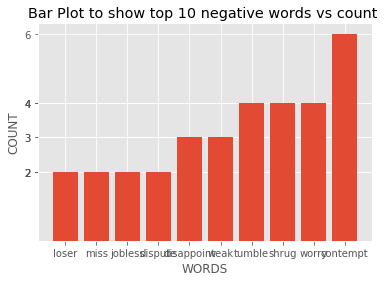

In [74]:
# Plotting the Bar Plot to show top 10 negative words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [75]:
comb_word_news={}

In [76]:
for x in final_dataset_News.TSLA_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [77]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['right', 'noteworthy', 'win', 'boom', 'safe', 'autonomous', 'boost', 'best', 'top', 'gain'] [2, 2, 3, 3, 3, 4, 4, 5, 7, 7]


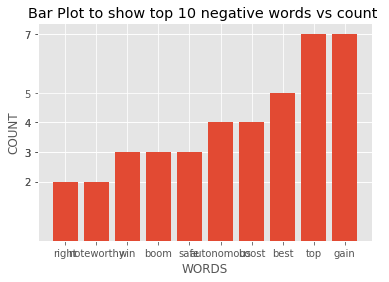

In [78]:
# Plotting the Bar Plot to show top 10 positive words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [79]:
#### USING POSITIVE LIST AND NEGATIVE LIST

In [80]:
final_dataset_News['pos_parity_news']=final_dataset_News['TSLA_nonstop'].apply(lambda x: pos_parity(x))

In [81]:
final_dataset_News['neg_parity_news']=final_dataset_News['TSLA_nonstop'].apply(lambda x: neg_parity(x))

In [82]:
final_dataset_News

Month Day                                       TSLA_nonstop  \
0      3  16  {'nasdaq': 1, 'movers': 1, 'adbe': 1, 'avgo': ...   
1      3  17  {'tesla': 2, 'unveil': 1, 'model': 1, 'need': ...   
2      3  18  {'elon': 2, 'musk': 2, 'never': 1, 'seek': 1, ...   
3      3  19  {'tesla': 3, 'tsla': 2, 'dip': 1, 'broader': 1...   
4      3  20  {'top': 1, 'stock': 3, 'trade': 1, 'thursday':...   
5      3  21  {'teslas': 1, 'musk': 1, 'tell': 1, 'employees...   
6      3  22  {'top': 1, 'analyst': 1, 'report': 1, 'alphabe...   
7      3  23  {'reason': 1, 'tesla': 1, 'investors': 1, 'ign...   
8      3  24  {'ways': 1, 'technology': 1, 'transform': 1, '...   
9      3  25  {'closer': 1, 'look': 1, 'model': 2, 'ys': 1, ...   
10     3  26  {'tesla': 1, 'trade': 1, 'must': 1, 'see': 1, ...   
11     3  27  {'ford': 1, 'reshuffle': 1, 'electric': 1, 've...   
12     3  28  {'marijuana': 1, 'stock': 1, 'go': 1, 'mainstr...   
13     3  29  {'stock': 3, 'market': 1, 'predictions': 1, 's...   
14     3  30  {'many': 1, 'vehicles': 1, 'tesla': 1, 'delive...   
15     3  31  {'teslas': 1, 'vehicle': 1, 'delivery': 1, 'up...   
16     4   1  {'tesla': 5, 'stock': 6, 'head': 1, 'driverles...   
17     4  10  {'could': 2, 'tesla': 9, 'get': 1, 'boost': 3,...   
18     4  11  {'germany': 1, 'invest': 1, 'billion': 1, 'bat...   
19     4  12  {'company': 1, 'news': 1, 'apr': 1, 'fridays':...   
20     4  13  {'energy': 1, 'stock': 1, 'play': 1, 'marijuan...   
21     4  14  {'vw': 1, 'take': 1, 'tesla': 1, 'x': 1, 'chin...   
22     4  15  {'tesla': 1, 'tsla': 1, 'dip': 1, 'broader': 1...   
23     4  16  {'rowe': 1, 'price': 1, 'fund': 1, 'slash': 1,...   
24     4   2  {'tesla': 2, 'tsla': 2, 'stock': 1, 'move': 1,...   
25     4   3  {'tesla': 5, 'deliveries': 2, 'drop': 2, 'due'...   
26     4   4  {'happen': 1, 'stock': 13, 'market': 4, 'today...   
27     4   5  {'bezos': 1, 'amazon': 1, 'stock': 1, 'owners'...   
28     4   6  {'heres': 1, 'tesla': 2, 'march': 1, 'flex': 1...   
29     4   7  {'fiat': 1, 'chrysler': 1, 'pay': 1, 'tesla': ...   
30     4   8  {'tesla': 2, 'tsla': 3, 'stock': 5, 'sink': 1,...   
31     4   9  {'apple': 1, 'roundup': 1, 'beat': 1, 'spotify...   

    pos_parity_news  neg_parity_news  
0          0.000000         0.044118  
1          0.075472         0.037736  
2          0.027027         0.054054  
3          0.057143         0.000000  
4          0.063830         0.021277  
5          0.052632         0.052632  
6          0.030303         0.131313  
7          0.000000         0.166667  
8          0.000000         0.000000  
9          0.037500         0.000000  
10         0.000000         0.000000  
11         0.000000         0.000000  
12         0.000000         0.040000  
13         0.033898         0.033898  
14         0.000000         0.000000  
15         0.142857         0.000000  
16         0.085106         0.053191  
17         0.044944         0.028090  
18         0.028169         0.014085  
19         0.028571         0.028571  
20         0.200000         0.000000  
21         0.000000         0.000000  
22         0.031250         0.093750  
23         0.011236         0.022472  
24         0.058824         0.058824  
25         0.027397         0.000000  
26         0.018692         0.058411  
27         0.000000         0.000000  
28         0.100000         0.000000  
29         0.000000         0.111111  
30         0.036585         0.060976  
31         0.000000         0.000000

In [83]:
new_df_News= final_dataset_News.drop(["TSLA_nonstop","Month","Day"], axis=1)
final_dataset_News['Day'] = final_dataset_News['Day'].astype(int)
final_dataset_News['Month'] = final_dataset_News['Month'].astype(int)
new_df_News

pos_parity_news  neg_parity_news
0          0.000000         0.044118
1          0.075472         0.037736
2          0.027027         0.054054
3          0.057143         0.000000
4          0.063830         0.021277
5          0.052632         0.052632
6          0.030303         0.131313
7          0.000000         0.166667
8          0.000000         0.000000
9          0.037500         0.000000
10         0.000000         0.000000
11         0.000000         0.000000
12         0.000000         0.040000
13         0.033898         0.033898
14         0.000000         0.000000
15         0.142857         0.000000
16         0.085106         0.053191
17         0.044944         0.028090
18         0.028169         0.014085
19         0.028571         0.028571
20         0.200000         0.000000
21         0.000000         0.000000
22         0.031250         0.093750
23         0.011236         0.022472
24         0.058824         0.058824
25         0.027397         0.000000
26         0.018692         0.058411
27         0.000000         0.000000
28         0.100000         0.000000
29         0.000000         0.111111
30         0.036585         0.060976
31         0.000000         0.000000

### GETTING STOCKS DATA

In [84]:
df2 = pd.read_csv('Tesla_Stock.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [85]:
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  283.720001  274.399994  283.510010  275.429993  14785500   
1   3/16/2019  283.720001  274.399994  283.510010  275.429993  14785500   
2   3/17/2019  283.720001  274.399994  283.510010  275.429993  14785500   
3   3/18/2019  278.049988  267.299988  276.000000  269.489990  10281000   
4   3/19/2019  273.299988  263.459992  267.500000  267.470001  11800600   
5   3/20/2019  274.970001  266.299988  269.690002  273.600006   6908200   
6   3/21/2019  276.450012  268.450012  272.600006  274.019989   5947100   
7   3/22/2019  272.799988  264.000000  272.579987  264.529999   8745600   
8   3/23/2019  272.799988  264.000000  272.579987  264.529999   8745600   
9   3/24/2019  272.799988  264.000000  272.579987  264.529999   8745600   
10  3/25/2019  263.179993  254.460007  259.709992  260.420013  10215000   
11  3/26/2019  270.260010  264.429993  264.440002  267.769989   7350900   
12  3/27/2019  275.369995  268.179993  268.750000  274.829987   8779200   
13  3/28/2019  280.329987  275.100006  277.160004  278.619995   6774100   
14  3/29/2019  280.160004  274.500000  278.700012  279.859985   5991300   
15  3/30/2019  280.160004  274.500000  278.700012  279.859985   5991300   
16  3/31/2019  280.160004  274.500000  278.700012  279.859985   5991300   
17   4/1/2019  289.200012  281.279999  282.619995  289.179993   8110400   
18   4/2/2019  289.440002  283.880005  288.299988  285.880005   5478900   
19   4/3/2019  296.170013  287.170013  287.320007  291.809998   7929900   
20   4/4/2019  271.200012  260.589996  261.890015  267.779999  23720700   
21   4/5/2019  276.100006  266.109985  269.859985  274.959992  13038300   
22   4/6/2019  276.100006  266.109985  269.859985  274.959992  13038300   
23   4/7/2019  276.100006  266.109985  269.859985  274.959992  13038300   
24   4/8/2019  281.160004  270.440002  277.690002  273.200012  10410400   
25   4/9/2019  275.000000  269.609985  271.649994  272.309998   5904000   
26  4/10/2019  278.380005  272.890015  276.739990  276.059998   7061300   
27  4/11/2019  270.500000  265.600006  268.299988  268.420013   9835900   
28  4/12/2019  271.950012  266.829987  270.220001  267.700012   6746000   
29  4/13/2019  271.950012  266.829987  270.220001  267.700012   6746000   
30  4/14/2019  271.950012  266.829987  270.220001  267.700012   6746000   
31  4/15/2019  268.880005  258.630005  268.630005  266.380005  10038600   
32  4/16/2019  275.000000  264.720001  265.750000  273.359985   7272900   

     Adj Close  
0   275.429993  
1   275.429993  
2   275.429993  
3   269.489990  
4   267.470001  
5   273.600006  
6   274.019989  
7   264.529999  
8   264.529999  
9   264.529999  
10  260.420013  
11  267.769989  
12  274.829987  
13  278.619995  
14  279.859985  
15  279.859985  
16  279.859985  
17  289.179993  
18  285.880005  
19  291.809998  
20  267.779999  
21  274.959992  
22  274.959992  
23  274.959992  
24  273.200012  
25  272.309998  
26  276.059998  
27  268.420013  
28  267.700012  
29  267.700012  
30  267.700012  
31  266.380005  
32  273.359985

In [86]:
Vol=df2[['Volume']]

In [87]:
#Calculating normalized value for Volume of Stocks using preprocessing.
min_max_scaler=preprocessing.MinMaxScaler()
vol_scaled=min_max_scaler.fit_transform(Vol)

C:\SAHAJ_1\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [88]:
Vol_normalized=pd.DataFrame(vol_scaled,columns=["Volume_norm"])
df2["Vol_normalized"]=Vol_normalized
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  283.720001  274.399994  283.510010  275.429993  14785500   
1   3/16/2019  283.720001  274.399994  283.510010  275.429993  14785500   
2   3/17/2019  283.720001  274.399994  283.510010  275.429993  14785500   
3   3/18/2019  278.049988  267.299988  276.000000  269.489990  10281000   
4   3/19/2019  273.299988  263.459992  267.500000  267.470001  11800600   
5   3/20/2019  274.970001  266.299988  269.690002  273.600006   6908200   
6   3/21/2019  276.450012  268.450012  272.600006  274.019989   5947100   
7   3/22/2019  272.799988  264.000000  272.579987  264.529999   8745600   
8   3/23/2019  272.799988  264.000000  272.579987  264.529999   8745600   
9   3/24/2019  272.799988  264.000000  272.579987  264.529999   8745600   
10  3/25/2019  263.179993  254.460007  259.709992  260.420013  10215000   
11  3/26/2019  270.260010  264.429993  264.440002  267.769989   7350900   
12  3/27/2019  275.369995  268.179993  268.750000  274.829987   8779200   
13  3/28/2019  280.329987  275.100006  277.160004  278.619995   6774100   
14  3/29/2019  280.160004  274.500000  278.700012  279.859985   5991300   
15  3/30/2019  280.160004  274.500000  278.700012  279.859985   5991300   
16  3/31/2019  280.160004  274.500000  278.700012  279.859985   5991300   
17   4/1/2019  289.200012  281.279999  282.619995  289.179993   8110400   
18   4/2/2019  289.440002  283.880005  288.299988  285.880005   5478900   
19   4/3/2019  296.170013  287.170013  287.320007  291.809998   7929900   
20   4/4/2019  271.200012  260.589996  261.890015  267.779999  23720700   
21   4/5/2019  276.100006  266.109985  269.859985  274.959992  13038300   
22   4/6/2019  276.100006  266.109985  269.859985  274.959992  13038300   
23   4/7/2019  276.100006  266.109985  269.859985  274.959992  13038300   
24   4/8/2019  281.160004  270.440002  277.690002  273.200012  10410400   
25   4/9/2019  275.000000  269.609985  271.649994  272.309998   5904000   
26  4/10/2019  278.380005  272.890015  276.739990  276.059998   7061300   
27  4/11/2019  270.500000  265.600006  268.299988  268.420013   9835900   
28  4/12/2019  271.950012  266.829987  270.220001  267.700012   6746000   
29  4/13/2019  271.950012  266.829987  270.220001  267.700012   6746000   
30  4/14/2019  271.950012  266.829987  270.220001  267.700012   6746000   
31  4/15/2019  268.880005  258.630005  268.630005  266.380005  10038600   
32  4/16/2019  275.000000  264.720001  265.750000  273.359985   7272900   

     Adj Close  Vol_normalized  
0   275.429993        0.510180  
1   275.429993        0.510180  
2   275.429993        0.510180  
3   269.489990        0.263247  
4   267.470001        0.346550  
5   273.600006        0.078353  
6   274.019989        0.025666  
7   264.529999        0.179078  
8   264.529999        0.179078  
9   264.529999        0.179078  
10  260.420013        0.259629  
11  267.769989        0.102621  
12  274.829987        0.180920  
13  278.619995        0.071002  
14  279.859985        0.028089  
15  279.859985        0.028089  
16  279.859985        0.028089  
17  289.179993        0.144257  
18  285.880005        0.000000  
19  291.809998        0.134362  
20  267.779999        1.000000  
21  274.959992        0.414400  
22  274.959992        0.414400  
23  274.959992        0.414400  
24  273.200012        0.270341  
25  272.309998        0.023304  
26  276.059998        0.086746  
27  268.420013        0.238847  
28  267.700012        0.069461  
29  267.700012        0.069461  
30  267.700012        0.069461  
31  266.380005        0.249959  
32  273.359985        0.098346

In [89]:
df2['daily_return']= (df2['Close']-df2['Open'])/df2['Open']
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  283.720001  274.399994  283.510010  275.429993  14785500   
1   3/16/2019  283.720001  274.399994  283.510010  275.429993  14785500   
2   3/17/2019  283.720001  274.399994  283.510010  275.429993  14785500   
3   3/18/2019  278.049988  267.299988  276.000000  269.489990  10281000   
4   3/19/2019  273.299988  263.459992  267.500000  267.470001  11800600   
5   3/20/2019  274.970001  266.299988  269.690002  273.600006   6908200   
6   3/21/2019  276.450012  268.450012  272.600006  274.019989   5947100   
7   3/22/2019  272.799988  264.000000  272.579987  264.529999   8745600   
8   3/23/2019  272.799988  264.000000  272.579987  264.529999   8745600   
9   3/24/2019  272.799988  264.000000  272.579987  264.529999   8745600   
10  3/25/2019  263.179993  254.460007  259.709992  260.420013  10215000   
11  3/26/2019  270.260010  264.429993  264.440002  267.769989   7350900   
12  3/27/2019  275.369995  268.179993  268.750000  274.829987   8779200   
13  3/28/2019  280.329987  275.100006  277.160004  278.619995   6774100   
14  3/29/2019  280.160004  274.500000  278.700012  279.859985   5991300   
15  3/30/2019  280.160004  274.500000  278.700012  279.859985   5991300   
16  3/31/2019  280.160004  274.500000  278.700012  279.859985   5991300   
17   4/1/2019  289.200012  281.279999  282.619995  289.179993   8110400   
18   4/2/2019  289.440002  283.880005  288.299988  285.880005   5478900   
19   4/3/2019  296.170013  287.170013  287.320007  291.809998   7929900   
20   4/4/2019  271.200012  260.589996  261.890015  267.779999  23720700   
21   4/5/2019  276.100006  266.109985  269.859985  274.959992  13038300   
22   4/6/2019  276.100006  266.109985  269.859985  274.959992  13038300   
23   4/7/2019  276.100006  266.109985  269.859985  274.959992  13038300   
24   4/8/2019  281.160004  270.440002  277.690002  273.200012  10410400   
25   4/9/2019  275.000000  269.609985  271.649994  272.309998   5904000   
26  4/10/2019  278.380005  272.890015  276.739990  276.059998   7061300   
27  4/11/2019  270.500000  265.600006  268.299988  268.420013   9835900   
28  4/12/2019  271.950012  266.829987  270.220001  267.700012   6746000   
29  4/13/2019  271.950012  266.829987  270.220001  267.700012   6746000   
30  4/14/2019  271.950012  266.829987  270.220001  267.700012   6746000   
31  4/15/2019  268.880005  258.630005  268.630005  266.380005  10038600   
32  4/16/2019  275.000000  264.720001  265.750000  273.359985   7272900   

     Adj Close  Vol_normalized  daily_return  
0   275.429993        0.510180     -0.028500  
1   275.429993        0.510180     -0.028500  
2   275.429993        0.510180     -0.028500  
3   269.489990        0.263247     -0.023587  
4   267.470001        0.346550     -0.000112  
5   273.600006        0.078353      0.014498  
6   274.019989        0.025666      0.005209  
7   264.529999        0.179078     -0.029533  
8   264.529999        0.179078     -0.029533  
9   264.529999        0.179078     -0.029533  
10  260.420013        0.259629      0.002734  
11  267.769989        0.102621      0.012593  
12  274.829987        0.180920      0.022623  
13  278.619995        0.071002      0.005268  
14  279.859985        0.028089      0.004162  
15  279.859985        0.028089      0.004162  
16  279.859985        0.028089      0.004162  
17  289.179993        0.144257      0.023211  
18  285.880005        0.000000     -0.008394  
19  291.809998        0.134362      0.015627  
20  267.779999        1.000000      0.022490  
21  274.959992        0.414400      0.018899  
22  274.959992        0.414400      0.018899  
23  274.959992        0.414400      0.018899  
24  273.200012        0.270341     -0.016169  
25  272.309998        0.023304      0.002430  
26  276.059998        0.086746     -0.002457  
27  268.420013        0.238847      0.000447  
28  267.700012        0.069461     -0.009326  
29  267.700012        0.069461     -0.009326  
3

In [90]:
Tesla_Data_Stock=df2
print(type(Tesla_Data_Stock.Date))
print(type(df2.Date))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [91]:
Tesla_Data_Stock['Month']=[d.split('/')[0] for d in Tesla_Data_Stock.Date]
Tesla_Data_Stock['Day']=[d.split('/')[1] for d in Tesla_Data_Stock.Date]
Tesla_Data_Stock['Year']=[d.split('/')[2] for d in Tesla_Data_Stock.Date]

33
33


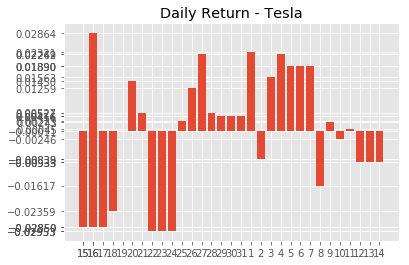

In [92]:
#Plotting Daily Return

daily_return_list=[]
for x in Tesla_Data_Stock.daily_return:
    daily_return_list.append(x)
print(len(daily_return_list))
day_list=[]
for x in Tesla_Data_Stock.Day:
    day_list.append(x)
print(len(day_list))
#plt.hist(daily_return_list)
y=day_list
plt.bar(y, height=daily_return_list)
plt.title("Daily Return - Tesla")
plt.xticks(day_list,day_list)
plt.yticks(daily_return_list)
plt.figure.figsize=(50,20)

plt.show()

The graph above shows the Daily Returns. It can be seen that the daily return on 4/8 comes out to be negative and the scores for 4/7 were :
		{'tesla': 2, 'tsla': 3, 'stock': 5, 'sink': 1,...			
pos_tweets_score:0.042249

neg_tweets_score:0.044740

pos_news_score:0.036585

neg_news_score:0.060976.

This is some of the few examples. It can be observed that the sentiments for the day before were reflected on Close values the day after. One of the reasons of our model for not capturing this data was that TSLA was quiet inconsistent with the scores as it started out with negative and it can be considered that this momentum of negativity surpassed the recent positivity. 

In [93]:
Tesla_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  283.720001  274.399994  283.510010  275.429993  14785500   
1   3/16/2019  283.720001  274.399994  283.510010  275.429993  14785500   
2   3/17/2019  283.720001  274.399994  283.510010  275.429993  14785500   
3   3/18/2019  278.049988  267.299988  276.000000  269.489990  10281000   
4   3/19/2019  273.299988  263.459992  267.500000  267.470001  11800600   
5   3/20/2019  274.970001  266.299988  269.690002  273.600006   6908200   
6   3/21/2019  276.450012  268.450012  272.600006  274.019989   5947100   
7   3/22/2019  272.799988  264.000000  272.579987  264.529999   8745600   
8   3/23/2019  272.799988  264.000000  272.579987  264.529999   8745600   
9   3/24/2019  272.799988  264.000000  272.579987  264.529999   8745600   
10  3/25/2019  263.179993  254.460007  259.709992  260.420013  10215000   
11  3/26/2019  270.260010  264.429993  264.440002  267.769989   7350900   
12  3/27/2019  275.369995  268.179993  268.750000  274.829987   8779200   
13  3/28/2019  280.329987  275.100006  277.160004  278.619995   6774100   
14  3/29/2019  280.160004  274.500000  278.700012  279.859985   5991300   
15  3/30/2019  280.160004  274.500000  278.700012  279.859985   5991300   
16  3/31/2019  280.160004  274.500000  278.700012  279.859985   5991300   
17   4/1/2019  289.200012  281.279999  282.619995  289.179993   8110400   
18   4/2/2019  289.440002  283.880005  288.299988  285.880005   5478900   
19   4/3/2019  296.170013  287.170013  287.320007  291.809998   7929900   
20   4/4/2019  271.200012  260.589996  261.890015  267.779999  23720700   
21   4/5/2019  276.100006  266.109985  269.859985  274.959992  13038300   
22   4/6/2019  276.100006  266.109985  269.859985  274.959992  13038300   
23   4/7/2019  276.100006  266.109985  269.859985  274.959992  13038300   
24   4/8/2019  281.160004  270.440002  277.690002  273.200012  10410400   
25   4/9/2019  275.000000  269.609985  271.649994  272.309998   5904000   
26  4/10/2019  278.380005  272.890015  276.739990  276.059998   7061300   
27  4/11/2019  270.500000  265.600006  268.299988  268.420013   9835900   
28  4/12/2019  271.950012  266.829987  270.220001  267.700012   6746000   
29  4/13/2019  271.950012  266.829987  270.220001  267.700012   6746000   
30  4/14/2019  271.950012  266.829987  270.220001  267.700012   6746000   
31  4/15/2019  268.880005  258.630005  268.630005  266.380005  10038600   
32  4/16/2019  275.000000  264.720001  265.750000  273.359985   7272900   

     Adj Close  Vol_normalized  daily_return Month Day  Year  
0   275.429993        0.510180     -0.028500     3  15  2019  
1   275.429993        0.510180     -0.028500     3  16  2019  
2   275.429993        0.510180     -0.028500     3  17  2019  
3   269.489990        0.263247     -0.023587     3  18  2019  
4   267.470001        0.346550     -0.000112     3  19  2019  
5   273.600006        0.078353      0.014498     3  20  2019  
6   274.019989        0.025666      0.005209     3  21  2019  
7   264.529999        0.179078     -0.029533     3  22  2019  
8   264.529999        0.179078     -0.029533     3  23  2019  
9   264.529999        0.179078     -0.029533     3  24  2019  
10  260.420013        0.259629      0.002734     3  25  2019  
11  267.769989        0.102621      0.012593     3  26  2019  
12  274.829987        0.180920      0.022623     3  27  2019  
13  278.619995        0.071002      0.005268     3  28  2019  
14  279.859985        0.028089      0.004162     3  29  2019  
15  279.859985        0.028089      0.004162     3  30  2019  
16  279.859985        0.028089      0.004162     3  31  2019  
17  289.179993        0.144257      0.023211     4   1  2019  
18  285.880005        0.000000     -0.008394     4   2  2019  
19  291.809998        0.134362      0.015627     4   3  2019  
20  267.779999        1.000000      0.022490     4   4  2019  
21  274.959992        0.414400      0.018899     4   5  2019  
22  274.9

In [94]:
Tesla_Data_Stock = Tesla_Data_Stock.drop(['Year'],axis=1)
Tesla_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  283.720001  274.399994  283.510010  275.429993  14785500   
1   3/16/2019  283.720001  274.399994  283.510010  275.429993  14785500   
2   3/17/2019  283.720001  274.399994  283.510010  275.429993  14785500   
3   3/18/2019  278.049988  267.299988  276.000000  269.489990  10281000   
4   3/19/2019  273.299988  263.459992  267.500000  267.470001  11800600   
5   3/20/2019  274.970001  266.299988  269.690002  273.600006   6908200   
6   3/21/2019  276.450012  268.450012  272.600006  274.019989   5947100   
7   3/22/2019  272.799988  264.000000  272.579987  264.529999   8745600   
8   3/23/2019  272.799988  264.000000  272.579987  264.529999   8745600   
9   3/24/2019  272.799988  264.000000  272.579987  264.529999   8745600   
10  3/25/2019  263.179993  254.460007  259.709992  260.420013  10215000   
11  3/26/2019  270.260010  264.429993  264.440002  267.769989   7350900   
12  3/27/2019  275.369995  268.179993  268.750000  274.829987   8779200   
13  3/28/2019  280.329987  275.100006  277.160004  278.619995   6774100   
14  3/29/2019  280.160004  274.500000  278.700012  279.859985   5991300   
15  3/30/2019  280.160004  274.500000  278.700012  279.859985   5991300   
16  3/31/2019  280.160004  274.500000  278.700012  279.859985   5991300   
17   4/1/2019  289.200012  281.279999  282.619995  289.179993   8110400   
18   4/2/2019  289.440002  283.880005  288.299988  285.880005   5478900   
19   4/3/2019  296.170013  287.170013  287.320007  291.809998   7929900   
20   4/4/2019  271.200012  260.589996  261.890015  267.779999  23720700   
21   4/5/2019  276.100006  266.109985  269.859985  274.959992  13038300   
22   4/6/2019  276.100006  266.109985  269.859985  274.959992  13038300   
23   4/7/2019  276.100006  266.109985  269.859985  274.959992  13038300   
24   4/8/2019  281.160004  270.440002  277.690002  273.200012  10410400   
25   4/9/2019  275.000000  269.609985  271.649994  272.309998   5904000   
26  4/10/2019  278.380005  272.890015  276.739990  276.059998   7061300   
27  4/11/2019  270.500000  265.600006  268.299988  268.420013   9835900   
28  4/12/2019  271.950012  266.829987  270.220001  267.700012   6746000   
29  4/13/2019  271.950012  266.829987  270.220001  267.700012   6746000   
30  4/14/2019  271.950012  266.829987  270.220001  267.700012   6746000   
31  4/15/2019  268.880005  258.630005  268.630005  266.380005  10038600   
32  4/16/2019  275.000000  264.720001  265.750000  273.359985   7272900   

     Adj Close  Vol_normalized  daily_return Month Day  
0   275.429993        0.510180     -0.028500     3  15  
1   275.429993        0.510180     -0.028500     3  16  
2   275.429993        0.510180     -0.028500     3  17  
3   269.489990        0.263247     -0.023587     3  18  
4   267.470001        0.346550     -0.000112     3  19  
5   273.600006        0.078353      0.014498     3  20  
6   274.019989        0.025666      0.005209     3  21  
7   264.529999        0.179078     -0.029533     3  22  
8   264.529999        0.179078     -0.029533     3  23  
9   264.529999        0.179078     -0.029533     3  24  
10  260.420013        0.259629      0.002734     3  25  
11  267.769989        0.102621      0.012593     3  26  
12  274.829987        0.180920      0.022623     3  27  
13  278.619995        0.071002      0.005268     3  28  
14  279.859985        0.028089      0.004162     3  29  
15  279.859985        0.028089      0.004162     3  30  
16  279.859985        0.028089      0.004162     3  31  
17  289.179993        0.144257      0.023211     4   1  
18  285.880005        0.000000     -0.008394     4   2  
19  291.809998        0.134362      0.015627     4   3  
20  267.779999        1.000000      0.022490     4   4  
21  274.959992        0.414400      0.018899     4   5  
22  274.959992        0.414400      0.018899     4   6  
23  274.959992        0.414400      0.018899     4   7  
24  273.200012        0.270341   

In [95]:
Tesla_Data_Stock['Day'] = Tesla_Data_Stock['Day'].astype(int)
Tesla_Data_Stock['Month'] = Tesla_Data_Stock['Month'].astype(int)

In [96]:
Tesla_Data_Stock["1d"] = np.round(Tesla_Data_Stock["Close"].rolling(window=1,center=False).mean(),2) 

In [97]:
Tesla_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  283.720001  274.399994  283.510010  275.429993  14785500   
1   3/16/2019  283.720001  274.399994  283.510010  275.429993  14785500   
2   3/17/2019  283.720001  274.399994  283.510010  275.429993  14785500   
3   3/18/2019  278.049988  267.299988  276.000000  269.489990  10281000   
4   3/19/2019  273.299988  263.459992  267.500000  267.470001  11800600   
5   3/20/2019  274.970001  266.299988  269.690002  273.600006   6908200   
6   3/21/2019  276.450012  268.450012  272.600006  274.019989   5947100   
7   3/22/2019  272.799988  264.000000  272.579987  264.529999   8745600   
8   3/23/2019  272.799988  264.000000  272.579987  264.529999   8745600   
9   3/24/2019  272.799988  264.000000  272.579987  264.529999   8745600   
10  3/25/2019  263.179993  254.460007  259.709992  260.420013  10215000   
11  3/26/2019  270.260010  264.429993  264.440002  267.769989   7350900   
12  3/27/2019  275.369995  268.179993  268.750000  274.829987   8779200   
13  3/28/2019  280.329987  275.100006  277.160004  278.619995   6774100   
14  3/29/2019  280.160004  274.500000  278.700012  279.859985   5991300   
15  3/30/2019  280.160004  274.500000  278.700012  279.859985   5991300   
16  3/31/2019  280.160004  274.500000  278.700012  279.859985   5991300   
17   4/1/2019  289.200012  281.279999  282.619995  289.179993   8110400   
18   4/2/2019  289.440002  283.880005  288.299988  285.880005   5478900   
19   4/3/2019  296.170013  287.170013  287.320007  291.809998   7929900   
20   4/4/2019  271.200012  260.589996  261.890015  267.779999  23720700   
21   4/5/2019  276.100006  266.109985  269.859985  274.959992  13038300   
22   4/6/2019  276.100006  266.109985  269.859985  274.959992  13038300   
23   4/7/2019  276.100006  266.109985  269.859985  274.959992  13038300   
24   4/8/2019  281.160004  270.440002  277.690002  273.200012  10410400   
25   4/9/2019  275.000000  269.609985  271.649994  272.309998   5904000   
26  4/10/2019  278.380005  272.890015  276.739990  276.059998   7061300   
27  4/11/2019  270.500000  265.600006  268.299988  268.420013   9835900   
28  4/12/2019  271.950012  266.829987  270.220001  267.700012   6746000   
29  4/13/2019  271.950012  266.829987  270.220001  267.700012   6746000   
30  4/14/2019  271.950012  266.829987  270.220001  267.700012   6746000   
31  4/15/2019  268.880005  258.630005  268.630005  266.380005  10038600   
32  4/16/2019  275.000000  264.720001  265.750000  273.359985   7272900   

     Adj Close  Vol_normalized  daily_return  Month  Day      1d  
0   275.429993        0.510180     -0.028500      3   15  275.43  
1   275.429993        0.510180     -0.028500      3   16  275.43  
2   275.429993        0.510180     -0.028500      3   17  275.43  
3   269.489990        0.263247     -0.023587      3   18  269.49  
4   267.470001        0.346550     -0.000112      3   19  267.47  
5   273.600006        0.078353      0.014498      3   20  273.60  
6   274.019989        0.025666      0.005209      3   21  274.02  
7   264.529999        0.179078     -0.029533      3   22  264.53  
8   264.529999        0.179078     -0.029533      3   23  264.53  
9   264.529999        0.179078     -0.029533      3   24  264.53  
10  260.420013        0.259629      0.002734      3   25  260.42  
11  267.769989        0.102621      0.012593      3   26  267.77  
12  274.829987        0.180920      0.022623      3   27  274.83  
13  278.619995        0.071002      0.005268      3   28  278.62  
14  279.859985        0.028089      0.004162      3   29  279.86  
15  279.859985        0.028089      0.004162      3   30  279.86  
16  279.859985        0.028089      0.004162      3   31  279.86  
17  289.179993        0.144257      0.023211      4    1  289.18  
18  285.880005        0.000000     -0.008394      4    2  285.88  
19  291.809998        0.134362      0.015627      4    3  291.81  
20  267.779999        1.000000      0.022490      4

### FEATURE ENGINEERING

Feature Engineering is focused on generating potentially higher significant attributes from the data we have.

We performed merging data of tweets, news and stocks to create a final dataset.

We created a Date feature to signify each unique date without incorporating datetime datatype from data

We created Normalized Volume feature that described the total stock trades for a particular date(i.e wrt date_feature)

We created daily return per dollar feature that describes the motion of stock prices for a particular date.

In [98]:
#Merging Data to create a Combined Dataframe to apply ML Model.
df3=pd.merge(final_dataset_Tweets,final_dataset_News, how="outer", on=["Month","Day"])

In [99]:
df3

Month  Day                                      Tweet_nonstop  \
0       3   16  {'tsla': 962, 'bull': 6, 'thesis': 2, 'spend':...   
1       3   17  {'size': 16, 'right': 26, 'time': 34, 'x': 56,...   
2       3   18  {'hmmmm': 2, 'reply': 12, 'dms': 2, 'hno': 2, ...   
3       3   19  {'gwestr': 10, 'model': 186, 'least': 16, 'exp...   
4       3   20  {'haha': 2, 'yeah': 16, 'tsla': 2294, 'commit'...   
5       3   21  {'tsla': 2722, 'ap': 14, 'aid': 4, 'except': 8...   
6       3   22  {'read': 40, 'letter': 4, 'elon': 258, 'write'...   
7       3   23  {'simple': 2, 'thing': 18, 'dont': 52, 'get': ...   
8       3   24  {'sriniworld': 8, 'tilmanwinkler': 8, 'uhh': 2...   
9       3   25  {'inncentbystndr': 1, 'davidbcollum': 1, 'long...   
10      3   26  {'mobius': 2, 'really': 19, 'though': 6, 'unde...   
11      3   27  {'company': 40, 'fraudulently': 1, 'keep': 14,...   
12      3   28  {'free': 53, 'elonbachman': 54, 'jack': 58, 'w...   
13      3   30  {'tesla': 103, 'blitzscaling': 2, 'point': 7, ...   
14      3   31  {'elonmusk': 119, 'go': 42, 'pay': 13, 'semi':...   
15      4    1  {'tsla': 1048, 'sell': 42, 'model': 101, 'amon...   
16      4    2  {'tsla': 1047, 'ship': 1, 'water': 2, 'order':...   
17      4    3  {'moosedrivermt': 1, 'let': 22, 'know': 47, 'n...   
18      4    4  {'tsla': 1348, 'tesla': 329, 'tick': 5, 'time'...   
19      4    5  {'powerserious': 2, 'good': 41, 'plan': 9, 'ts...   
20      4    6  {'saxenapuru': 1, 'still': 19, 'tsla': 760, 'c...   
21      4    7  {'interest': 11, 'see': 30, 'tsla': 688, 'car'...   
22      4    8  {'vgrinshpun': 1, 'alterviggo': 2, 'still': 30...   
23      4    9  {'vote': 2, 'count': 9, 'tmc': 1, 'users': 1, ...   
24      4   10  {'ericbalchunas': 1, 'cgrantwsj': 3, 'cathiedw...   
25      4   11  {'teslacharts': 23, 'blue': 2, 'windbreakers':...   
26      4   12  {'tesla': 384, 'currently': 5, 'doj': 2, 'crim...   
27      4   13  {'fudiv': 2, 'due': 8, 'front': 5, 'include': ...   
28      4   14  {'enron': 1, 'tesla': 209, 'tsla': 849, 'belie...   
29      4   15  {'araphatso': 1, 'latrilife': 2, 'hilinetrail'...   
30      4   16  {'close': 23, 'shoot': 4, 'model': 85, 'hit': ...   
31      3   29                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.041736           0.041378   
1            0.045317           0.040570   
2            0.043514           0.042596   
3            0.042514           0.049939   
4            0.044483           0.038159   
5            0.044560           0.044374   
6            0.042963           0.042527   
7            0.043098           0.041702   
8            0.042973           0.041622   
9            0.040918           0.041623   
10           0.040038           0.043493   
11           0.040859           0.039659   
12           0.040085           0.043258   
13           0.048453           0.039123   
14           0.044484           0.039385   
15           0.043202           0.041123   
16           0.039789           0.037829   
17           0.044302           0.039110   
18           0.042788           0.050351   
19           0.040426           0.043639   
20           0.047927           0.040769   
21           0.043242           0.037492   
22           0.044740           0.042249   
23           0.043188           0.038150   
24           0.037550           0.037497   
25           0.039543           0.045255   
26           0.042224           0.041592   
27           0.044701           0.040484   
28           0.045526           0.044318   
29           0.043875           0.038564   
30           0.042245           0.038663   
31                NaN                NaN   

                                         TSLA_nonstop  pos_parity_news  \
0   {'nasdaq': 1, 'movers': 1, 'adbe': 1, 'avgo': ...         0.000000   
1   {'tesla': 2, 'unveil': 1, 'model': 1, 'need': ...         0.075472   
2   {'elon': 2, 'musk': 2, 'never': 1, 'seek': 1, .

In [100]:
df4= pd.merge(df3,Tesla_Data_Stock, how="outer", on=["Month","Day"])

In [101]:
df4

Month  Day                                      Tweet_nonstop  \
0       3   16  {'tsla': 962, 'bull': 6, 'thesis': 2, 'spend':...   
1       3   17  {'size': 16, 'right': 26, 'time': 34, 'x': 56,...   
2       3   18  {'hmmmm': 2, 'reply': 12, 'dms': 2, 'hno': 2, ...   
3       3   19  {'gwestr': 10, 'model': 186, 'least': 16, 'exp...   
4       3   20  {'haha': 2, 'yeah': 16, 'tsla': 2294, 'commit'...   
5       3   21  {'tsla': 2722, 'ap': 14, 'aid': 4, 'except': 8...   
6       3   22  {'read': 40, 'letter': 4, 'elon': 258, 'write'...   
7       3   23  {'simple': 2, 'thing': 18, 'dont': 52, 'get': ...   
8       3   24  {'sriniworld': 8, 'tilmanwinkler': 8, 'uhh': 2...   
9       3   25  {'inncentbystndr': 1, 'davidbcollum': 1, 'long...   
10      3   26  {'mobius': 2, 'really': 19, 'though': 6, 'unde...   
11      3   27  {'company': 40, 'fraudulently': 1, 'keep': 14,...   
12      3   28  {'free': 53, 'elonbachman': 54, 'jack': 58, 'w...   
13      3   30  {'tesla': 103, 'blitzscaling': 2, 'point': 7, ...   
14      3   31  {'elonmusk': 119, 'go': 42, 'pay': 13, 'semi':...   
15      4    1  {'tsla': 1048, 'sell': 42, 'model': 101, 'amon...   
16      4    2  {'tsla': 1047, 'ship': 1, 'water': 2, 'order':...   
17      4    3  {'moosedrivermt': 1, 'let': 22, 'know': 47, 'n...   
18      4    4  {'tsla': 1348, 'tesla': 329, 'tick': 5, 'time'...   
19      4    5  {'powerserious': 2, 'good': 41, 'plan': 9, 'ts...   
20      4    6  {'saxenapuru': 1, 'still': 19, 'tsla': 760, 'c...   
21      4    7  {'interest': 11, 'see': 30, 'tsla': 688, 'car'...   
22      4    8  {'vgrinshpun': 1, 'alterviggo': 2, 'still': 30...   
23      4    9  {'vote': 2, 'count': 9, 'tmc': 1, 'users': 1, ...   
24      4   10  {'ericbalchunas': 1, 'cgrantwsj': 3, 'cathiedw...   
25      4   11  {'teslacharts': 23, 'blue': 2, 'windbreakers':...   
26      4   12  {'tesla': 384, 'currently': 5, 'doj': 2, 'crim...   
27      4   13  {'fudiv': 2, 'due': 8, 'front': 5, 'include': ...   
28      4   14  {'enron': 1, 'tesla': 209, 'tsla': 849, 'belie...   
29      4   15  {'araphatso': 1, 'latrilife': 2, 'hilinetrail'...   
30      4   16  {'close': 23, 'shoot': 4, 'model': 85, 'hit': ...   
31      3   29                                                NaN   
32      3   15                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.041736           0.041378   
1            0.045317           0.040570   
2            0.043514           0.042596   
3            0.042514           0.049939   
4            0.044483           0.038159   
5            0.044560           0.044374   
6            0.042963           0.042527   
7            0.043098           0.041702   
8            0.042973           0.041622   
9            0.040918           0.041623   
10           0.040038           0.043493   
11           0.040859           0.039659   
12           0.040085           0.043258   
13           0.048453           0.039123   
14           0.044484           0.039385   
15           0.043202           0.041123   
16           0.039789           0.037829   
17           0.044302           0.039110   
18           0.042788           0.050351   
19           0.040426           0.043639   
20           0.047927           0.040769   
21           0.043242           0.037492   
22           0.044740           0.042249   
23           0.043188           0.038150   
24           0.037550           0.037497   
25           0.039543           0.045255   
26           0.042224           0.041592   
27           0.044701           0.040484   
28           0.045526           0.044318   
29           0.043875           0.038564   
30           0.042245           0.038663   
31                NaN                NaN   
32                NaN                NaN   

                                         TSLA_nonstop  pos_parity_news  \
0   {'nasdaq': 1, 'movers': 1, 'adbe': 1, 'avgo': ...         0.000000   
1   {'tesla'

In [102]:
temp_datafile_comb=df4[1:31]

In [103]:
temp_datafile_comb

Month  Day                                      Tweet_nonstop  \
1       3   17  {'size': 16, 'right': 26, 'time': 34, 'x': 56,...   
2       3   18  {'hmmmm': 2, 'reply': 12, 'dms': 2, 'hno': 2, ...   
3       3   19  {'gwestr': 10, 'model': 186, 'least': 16, 'exp...   
4       3   20  {'haha': 2, 'yeah': 16, 'tsla': 2294, 'commit'...   
5       3   21  {'tsla': 2722, 'ap': 14, 'aid': 4, 'except': 8...   
6       3   22  {'read': 40, 'letter': 4, 'elon': 258, 'write'...   
7       3   23  {'simple': 2, 'thing': 18, 'dont': 52, 'get': ...   
8       3   24  {'sriniworld': 8, 'tilmanwinkler': 8, 'uhh': 2...   
9       3   25  {'inncentbystndr': 1, 'davidbcollum': 1, 'long...   
10      3   26  {'mobius': 2, 'really': 19, 'though': 6, 'unde...   
11      3   27  {'company': 40, 'fraudulently': 1, 'keep': 14,...   
12      3   28  {'free': 53, 'elonbachman': 54, 'jack': 58, 'w...   
13      3   30  {'tesla': 103, 'blitzscaling': 2, 'point': 7, ...   
14      3   31  {'elonmusk': 119, 'go': 42, 'pay': 13, 'semi':...   
15      4    1  {'tsla': 1048, 'sell': 42, 'model': 101, 'amon...   
16      4    2  {'tsla': 1047, 'ship': 1, 'water': 2, 'order':...   
17      4    3  {'moosedrivermt': 1, 'let': 22, 'know': 47, 'n...   
18      4    4  {'tsla': 1348, 'tesla': 329, 'tick': 5, 'time'...   
19      4    5  {'powerserious': 2, 'good': 41, 'plan': 9, 'ts...   
20      4    6  {'saxenapuru': 1, 'still': 19, 'tsla': 760, 'c...   
21      4    7  {'interest': 11, 'see': 30, 'tsla': 688, 'car'...   
22      4    8  {'vgrinshpun': 1, 'alterviggo': 2, 'still': 30...   
23      4    9  {'vote': 2, 'count': 9, 'tmc': 1, 'users': 1, ...   
24      4   10  {'ericbalchunas': 1, 'cgrantwsj': 3, 'cathiedw...   
25      4   11  {'teslacharts': 23, 'blue': 2, 'windbreakers':...   
26      4   12  {'tesla': 384, 'currently': 5, 'doj': 2, 'crim...   
27      4   13  {'fudiv': 2, 'due': 8, 'front': 5, 'include': ...   
28      4   14  {'enron': 1, 'tesla': 209, 'tsla': 849, 'belie...   
29      4   15  {'araphatso': 1, 'latrilife': 2, 'hilinetrail'...   
30      4   16  {'close': 23, 'shoot': 4, 'model': 85, 'hit': ...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.045317           0.040570   
2            0.043514           0.042596   
3            0.042514           0.049939   
4            0.044483           0.038159   
5            0.044560           0.044374   
6            0.042963           0.042527   
7            0.043098           0.041702   
8            0.042973           0.041622   
9            0.040918           0.041623   
10           0.040038           0.043493   
11           0.040859           0.039659   
12           0.040085           0.043258   
13           0.048453           0.039123   
14           0.044484           0.039385   
15           0.043202           0.041123   
16           0.039789           0.037829   
17           0.044302           0.039110   
18           0.042788           0.050351   
19           0.040426           0.043639   
20           0.047927           0.040769   
21           0.043242           0.037492   
22           0.044740           0.042249   
23           0.043188           0.038150   
24           0.037550           0.037497   
25           0.039543           0.045255   
26           0.042224           0.041592   
27           0.044701           0.040484   
28           0.045526           0.044318   
29           0.043875           0.038564   
30           0.042245           0.038663   

                                         TSLA_nonstop  pos_parity_news  \
1   {'tesla': 2, 'unveil': 1, 'model': 1, 'need': ...         0.075472   
2   {'elon': 2, 'musk': 2, 'never': 1, 'seek': 1, ...         0.027027   
3   {'tesla': 3, 'tsla': 2, 'dip': 1, 'broader': 1...         0.057143   
4   {'top': 1, 'stock': 3, 'trade': 1, 'thursday':...         0.063830   
5   {'teslas': 1, 'musk': 1, 'tell': 1, 'employees...         0.052632   
6   {'top': 1, 'analyst': 1, 'report': 1, 'alphabe...  

In [104]:
temp_datafile_comb['date_feature']= (temp_datafile_comb['Month']+temp_datafile_comb['Day'])/temp_datafile_comb['Month']
temp_datafile_comb

C:\SAHAJ_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Month  Day                                      Tweet_nonstop  \
1       3   17  {'size': 16, 'right': 26, 'time': 34, 'x': 56,...   
2       3   18  {'hmmmm': 2, 'reply': 12, 'dms': 2, 'hno': 2, ...   
3       3   19  {'gwestr': 10, 'model': 186, 'least': 16, 'exp...   
4       3   20  {'haha': 2, 'yeah': 16, 'tsla': 2294, 'commit'...   
5       3   21  {'tsla': 2722, 'ap': 14, 'aid': 4, 'except': 8...   
6       3   22  {'read': 40, 'letter': 4, 'elon': 258, 'write'...   
7       3   23  {'simple': 2, 'thing': 18, 'dont': 52, 'get': ...   
8       3   24  {'sriniworld': 8, 'tilmanwinkler': 8, 'uhh': 2...   
9       3   25  {'inncentbystndr': 1, 'davidbcollum': 1, 'long...   
10      3   26  {'mobius': 2, 'really': 19, 'though': 6, 'unde...   
11      3   27  {'company': 40, 'fraudulently': 1, 'keep': 14,...   
12      3   28  {'free': 53, 'elonbachman': 54, 'jack': 58, 'w...   
13      3   30  {'tesla': 103, 'blitzscaling': 2, 'point': 7, ...   
14      3   31  {'elonmusk': 119, 'go': 42, 'pay': 13, 'semi':...   
15      4    1  {'tsla': 1048, 'sell': 42, 'model': 101, 'amon...   
16      4    2  {'tsla': 1047, 'ship': 1, 'water': 2, 'order':...   
17      4    3  {'moosedrivermt': 1, 'let': 22, 'know': 47, 'n...   
18      4    4  {'tsla': 1348, 'tesla': 329, 'tick': 5, 'time'...   
19      4    5  {'powerserious': 2, 'good': 41, 'plan': 9, 'ts...   
20      4    6  {'saxenapuru': 1, 'still': 19, 'tsla': 760, 'c...   
21      4    7  {'interest': 11, 'see': 30, 'tsla': 688, 'car'...   
22      4    8  {'vgrinshpun': 1, 'alterviggo': 2, 'still': 30...   
23      4    9  {'vote': 2, 'count': 9, 'tmc': 1, 'users': 1, ...   
24      4   10  {'ericbalchunas': 1, 'cgrantwsj': 3, 'cathiedw...   
25      4   11  {'teslacharts': 23, 'blue': 2, 'windbreakers':...   
26      4   12  {'tesla': 384, 'currently': 5, 'doj': 2, 'crim...   
27      4   13  {'fudiv': 2, 'due': 8, 'front': 5, 'include': ...   
28      4   14  {'enron': 1, 'tesla': 209, 'tsla': 849, 'belie...   
29      4   15  {'araphatso': 1, 'latrilife': 2, 'hilinetrail'...   
30      4   16  {'close': 23, 'shoot': 4, 'model': 85, 'hit': ...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.045317           0.040570   
2            0.043514           0.042596   
3            0.042514           0.049939   
4            0.044483           0.038159   
5            0.044560           0.044374   
6            0.042963           0.042527   
7            0.043098           0.041702   
8            0.042973           0.041622   
9            0.040918           0.041623   
10           0.040038           0.043493   
11           0.040859           0.039659   
12           0.040085           0.043258   
13           0.048453           0.039123   
14           0.044484           0.039385   
15           0.043202           0.041123   
16           0.039789           0.037829   
17           0.044302           0.039110   
18           0.042788           0.050351   
19           0.040426           0.043639   
20           0.047927           0.040769   
21           0.043242           0.037492   
22           0.044740           0.042249   
23           0.043188           0.038150   
24           0.037550           0.037497   
25           0.039543           0.045255   
26           0.042224           0.041592   
27           0.044701           0.040484   
28           0.045526           0.044318   
29           0.043875           0.038564   
30           0.042245           0.038663   

                                         TSLA_nonstop  pos_parity_news  \
1   {'tesla': 2, 'unveil': 1, 'model': 1, 'need': ...         0.075472   
2   {'elon': 2, 'musk': 2, 'never': 1, 'seek': 1, ...         0.027027   
3   {'tesla': 3, 'tsla': 2, 'dip': 1, 'broader': 1...         0.057143   
4   {'top': 1, 'stock': 3, 'trade': 1, 'thursday':...         0.063830   
5   {'teslas': 1, 'musk': 1, 'tell': 1, 'employees...         0.052632   
6   {'top': 1, 'analyst': 1, 'report': 1, 'alphabe...  

In [105]:
temp_datafile_comb=temp_datafile_comb.drop(["Month","Day","Tweet_nonstop","TSLA_nonstop","High","Low","Open","Volume","Adj Close"], axis=1)

In [106]:
temp_datafile_comb

pos_parity_tweets  neg_parity_tweets  pos_parity_news  neg_parity_news  \
1            0.045317           0.040570         0.075472         0.037736   
2            0.043514           0.042596         0.027027         0.054054   
3            0.042514           0.049939         0.057143         0.000000   
4            0.044483           0.038159         0.063830         0.021277   
5            0.044560           0.044374         0.052632         0.052632   
6            0.042963           0.042527         0.030303         0.131313   
7            0.043098           0.041702         0.000000         0.166667   
8            0.042973           0.041622         0.000000         0.000000   
9            0.040918           0.041623         0.037500         0.000000   
10           0.040038           0.043493         0.000000         0.000000   
11           0.040859           0.039659         0.000000         0.000000   
12           0.040085           0.043258         0.000000         0.040000   
13           0.048453           0.039123         0.000000         0.000000   
14           0.044484           0.039385         0.142857         0.000000   
15           0.043202           0.041123         0.085106         0.053191   
16           0.039789           0.037829         0.058824         0.058824   
17           0.044302           0.039110         0.027397         0.000000   
18           0.042788           0.050351         0.018692         0.058411   
19           0.040426           0.043639         0.000000         0.000000   
20           0.047927           0.040769         0.100000         0.000000   
21           0.043242           0.037492         0.000000         0.111111   
22           0.044740           0.042249         0.036585         0.060976   
23           0.043188           0.038150         0.000000         0.000000   
24           0.037550           0.037497         0.044944         0.028090   
25           0.039543           0.045255         0.028169         0.014085   
26           0.042224           0.041592         0.028571         0.028571   
27           0.044701           0.040484         0.200000         0.000000   
28           0.045526           0.044318         0.000000         0.000000   
29           0.043875           0.038564         0.031250         0.093750   
30           0.042245           0.038663         0.011236         0.022472   

         Date       Close  Vol_normalized  daily_return      1d  date_feature  
1   3/17/2019  275.429993        0.510180     -0.028500  275.43      6.666667  
2   3/18/2019  269.489990        0.263247     -0.023587  269.49      7.000000  
3   3/19/2019  267.470001        0.346550     -0.000112  267.47      7.333333  
4   3/20/2019  273.600006        0.078353      0.014498  273.60      7.666667  
5   3/21/2019  274.019989        0.025666      0.005209  274.02      8.000000  
6   3/22/2019  264.529999        0.179078     -0.029533  264.53      8.333333  
7   3/23/2019  264.529999        0.179078     -0.029533  264.53      8.666667  
8   3/24/2019  264.529999        0.179078     -0.029533  264.53      9.000000  
9   3/25/2019  260.420013        0.259629      0.002734  260.42      9.333333  
10  3/26/2019  267.769989        0.102621      0.012593  267.77      9.666667  
11  3/27/2019  274.829987        0.180920      0.022623  274.83     10.000000  
12  3/28/2019  278.619995        0.071002      0.005268  278.62     10.333333  
13  3/30/2019  279.859985        0.028089      0.004162  279.86     11.000000  
14  3/31/2019  279.859985        0.028089      0.004162  279.86     11.333333  
15   4/1/2019  289.179993        0.144257      0.023211  289.18      1.250000  
16   4/2/2019  285.880005        0.000000     -0.008394  285.88      1.500000  
17   4/3/2019  291.809998        0.134362      0.015627  291.81      1.750000  
18   4/4/2019  267.779999        1.000000      0.022490  267.78      2.000000  
19   4/5/2019  274.959992        0.414400      0.018899  274.96  

### Correlation Matrix

We made correlation matrix for all the variables to find out which variables are strongly related to each other. This was done to remove the variables that won’t be contributing much towards the prediction of closing stock prices.

We then used these selected variables for further analysis in our regression models. Variables with higher significance towards predicting closing stock prices are:

Pos_parity_news

Neg_parity_tweets

Date_feature

Normalized Volume

Daily return index.

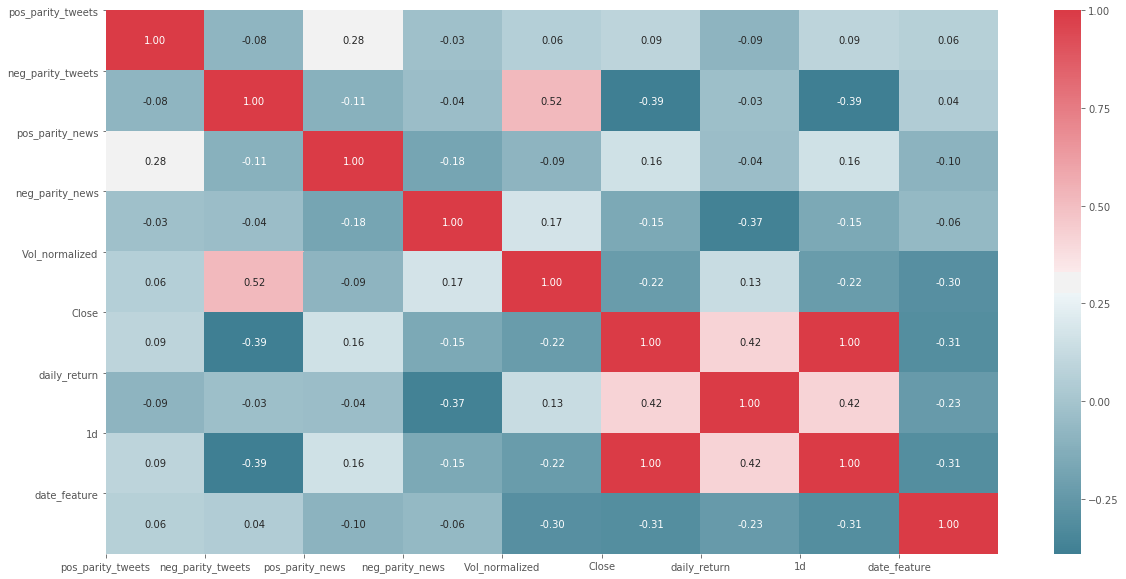

In [107]:
#Heat map to show correlation between attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr1 = temp_datafile_comb[['pos_parity_tweets','neg_parity_tweets','pos_parity_news','neg_parity_news','Vol_normalized', 'Close','daily_return','1d','date_feature']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.yticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.show()

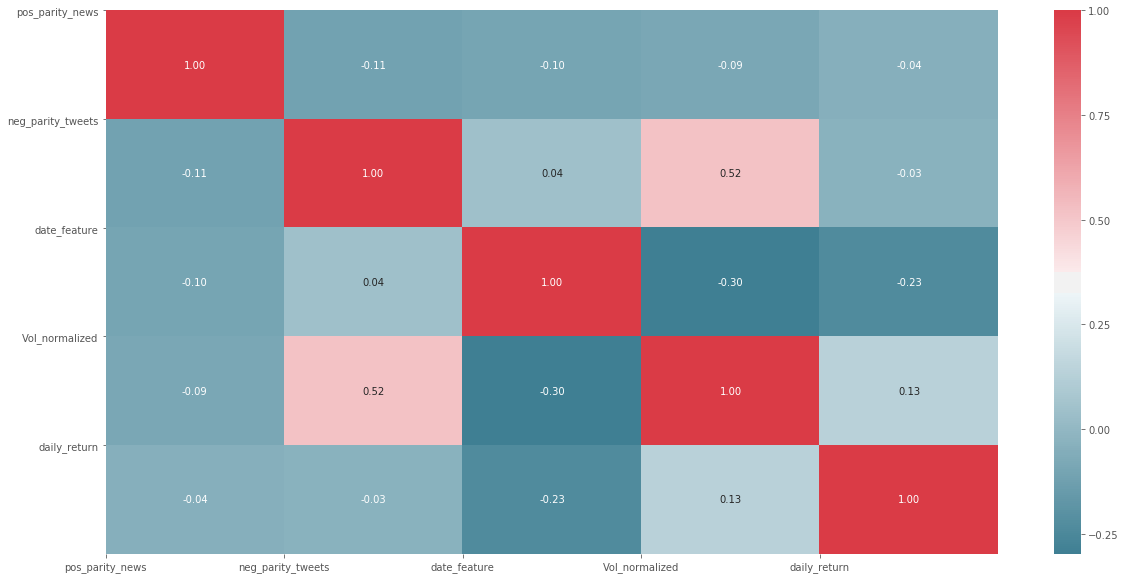

In [108]:
#Heat map to show correlation between significant attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr = temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized','daily_return']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.yticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.show()

### APPLIED ML

### Applying Simple Linear Regression Model

In [109]:
comb_model1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()

In [110]:
comb_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     3.234
Date:                Mon, 22 Apr 2019   Prob (F-statistic):             0.0226
Time:                        01:05:12   Log-Likelihood:                -94.103
No. Observations:                  30   AIC:                             200.2
Df Residuals:                      24   BIC:                             208.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           300.3336     17.125     17.538      0.000     264.989     335.678
pos_parity_news      16.4406     25.308      0.650      0.522     -35.792      68.674
neg_parity_tweets  -556.9385    435.186     -1.280      0.213   -1455.119     341.242
date_feature         -0.5921      0.400     -1.479      0.152      -1.419       0.234
Vol_normalized       -7.7893      7.245     -1.075      0.293     -22.741       7.163
daily_return        162.8281     68.747      2.368      0.026      20.940     304.716
==============================================================================
Omnibus:                        1.127   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                1.108
Skew:                           0.378   Prob(JB):                        0.575
Kurtosis:                       2.439   Cond. No.                     2.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
comb_model1.params

Intercept            300.333613
pos_parity_news       16.440616
neg_parity_tweets   -556.938523
date_feature          -0.592147
Vol_normalized        -7.789331
daily_return         162.828085
dtype: float64

In [112]:
model_plot1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()
par1 = dict(model_plot1.params)
print(par1) 

{'Intercept': 300.3336134027484, 'pos_parity_news': 16.44061553200285, 'neg_parity_tweets': -556.9385227615649, 'date_feature': -0.5921465563589727, 'Vol_normalized': -7.789330844788253, 'daily_return': 162.82808465943955}


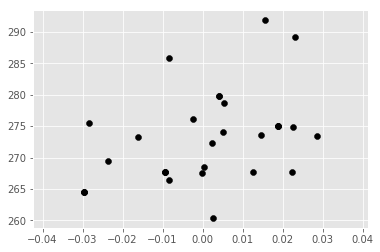

In [113]:
plt.scatter(temp_datafile_comb['daily_return'],temp_datafile_comb['Close'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['neg_parity_tweets'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['date_feature'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['Vol_normalized'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['daily_return'],color='black',label="data")

In [114]:
x = temp_datafile_comb['Close']
y1 = par1["Intercept"] + par1['pos_parity_news']*x + par1['neg_parity_tweets']*x+ par1['date_feature']*x+ par1['Vol_normalized']*x+ par1['daily_return']*x
#y2 = par1["Intercept"] + par1['neg_parity_tweets']*x
#y3 = par1["Intercept"] + par1['date_feature']*x
#y4 = par1["Intercept"] + par1['Vol_normalized']*x
#y5 = par1["Intercept"] + par1['daily_return']*x

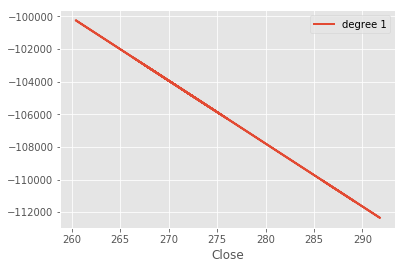

In [115]:
plt.plot(x,y1,label="degree 1",linewidth=2)
#plt.plot(x,y2,label="degree 2",linewidth=2)
#plt.plot(x,y3,label="degree 3",linewidth=2)
#plt.plot(x,y4,label="degree 4",linewidth=2)
#plt.plot(x,y5,label="degree 5",linewidth=2)
#plt.plot(x,y6,label="degree 6",linewidth=2)
plt.legend()
plt.xlabel('Close')
#plt.ylim((0,50))
plt.show()

### Applying Linear Regressor

In [116]:
X_x=temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized', 'daily_return']]
Y_y=temp_datafile_comb['Close']

In [117]:
# Train-Test Split for Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_x, Y_y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#print(metrics.accuracy_score(y_true=y_test, y_pred= y_pred))
#scores = cross_val_score(estimator=regressor, X=X_test, y=y_test, cv=10, scoring='accuracy')
#print(scores)

In [118]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": -1.7312


In [119]:
print('Coefficients: \n', regressor.coef_)
regressor.get_params()

Coefficients: 
 [  57.74184724 -584.94347839   -1.14811156  -10.88717091   86.01246663]


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

The performance for the Linear Regressor is not satisfactory for all the brands as the variation in the stock prices is not consisitent among all of them and these results may be attributed to the less data for the stock prices.

In [120]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(verbose=0)
forest_reg.fit(X_train, y_train)
y_pred= forest_reg.predict(X_test)

C:\SAHAJ_1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [121]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": -1.1708


Random Forest is more complicated model as compared to others as the final dataset was really small for random forest regressor, it attempted to learn the entire dataset. Thus, depicting overfitting in random forest regression model.